1-2 -ok

1-3

1-4

1-5

2-3 -ok

2-4 -ok

2-5

3-4

3-5

4-5 -ok

# World-living-quality-analysis

### Title:
Make Maslow Great Again ...or not
——A Statistical Methodology/Model/Proof/Falsification of Maslow's Pyramid

### Team members:
Worawich (Win) Chaiyakunapruk,
Phil Zhe Wang, 
Yao Xiao,  

### Summary: 
Maslow's hierarchy of needs, or the so-called Maslow pyramid, is a famous theory when we talk about human being's self-satisfaction. Raised in 1943, the book A Theory of Human Motivation, it describes people's psychological motivation in different developing periods.
However famous, the doubts it received has never been reduced. You will get over 20000 results in google scholar after typing in keywords like "Maslow's hierarchy of needs criticism".
But most of the criticisms are built from the point of Psychology, which makes them not that strong on my opinion.
This time, we will build the hierarchy model with real data, and try to prove if he is right or wrong.
Maslow used to be a great psychologist, but our slogan is:
Make Maslow Great Again! (or not, if possible, because in that situation is most likely to publish a paper)

### Hypotheses: 
1. Maslow's theory is right in all!
2. Maslow's theory is right to some extent!
3. Maslow's theory has a scope: it works for developing contries but not developed contries!

### Datasets:	
- World Happiness Report [https://www.kaggle.com/unsdsn/world-happiness]
- The Human Freedom Index [https://www.kaggle.com/gsutters/the-human-freedom-index]
- UNODC Global Criminal Justice Statistics [https://data.world/unodc/b4aa5785-7a33-4c07-af15-0f15d95a121f] I already registered and download this one.
- Poverty And Equity Database [https://datacatalog.worldbank.org/dataset/poverty-and-equity-database]
- IBRD Statement Of Loans - Historical Data [https://finances.worldbank.org/Loans-and-Credits/IBRD-Statement-Of-Loans-Historical-Data/zucq-nrc3]
- World Integrated Trade Solution Trade Stats [https://datacatalog.worldbank.org/dataset/world-integrated-trade-solution-trade-stats]
- Economic Fitness [https://datacatalog.worldbank.org/dataset/economic-fitness]
- Suicide Rates Overview 1985 to 2016 [https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016]
- World Bank: Education Data [https://www.kaggle.com/theworldbank/world-bank-intl-education]

### Mapping
- Physiological ——> Hunger/living data
- Safety ——> Criminal data
- Love/belonging ——> Marriage/Children/Family data
- Esteem ——> Position/Class data
- Self-actualization ——> Job satisfaction/Happiness data

### Git: 
https://github.com/winwowin/World-living-quality-analysis


## Getting data

In [439]:
class GET_DATA(object):
    def __init__(self):
        global logging
        import logging
        global pd
        import pandas as pd
    
    def Peace(self):
        """
        This is a function to pull the most updated peace data modified from https://www.kaggle.com/kretes/gpi2008-2016

        Global Peace Index (GPI) measures the relative position of nations' and regions' peacefulness.
        The GPI ranks 163 independent states and territories (99.7 per cent of the world’s population)
        according to their levels of peacefulness. In the past decade, the GPI has presented trends of 
        increased global violence and less peacefulness.

        The lower the number indicates more peace in the region.
        """
        import requests
        import re
        from bs4 import BeautifulSoup
        response = requests.get(url='https://en.wikipedia.org/wiki/Global_Peace_Index')
        soup = BeautifulSoup(response.text, 'html.parser')
        base_year = 2018        #latest year
        years = 9               #number of years to get data
        def get_countries_by_gpi():
            i = 1
            for table in soup.find_all('table', re.compile('wikitable sortable')):
                if table.find_all('th')[0].get_text() == 'Country\n':
                    for tr in table.find_all('tr'):
                        country_name = tr.find_all('a')[0].get_text()
                        if not country_name.startswith('['):
                            row = {'country': country_name}
                            for year, index in zip(range(base_year-years+1,base_year+1),range(2*(years),0,-2)):
                                score = tr.find_all('td')[index].get_text()
                                if score != '' and score != '\n':
                                    row['score_%s' % year] = float(score)
                            yield row

        import pandas as pd
        gpi = pd.DataFrame.from_dict(list(get_countries_by_gpi()))
        # print(gpi)
        gpi.to_csv('gpi_%s-%s.csv' % (base_year-years+1,base_year),index=False)
        gpi.columns = ['Country','pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
        return(gpi)    

    
    def Trade(self):
        """
        WITS Trade Stats is a database created by aggregating data from UN COMTRADE and UNCTAD TRAINS database. 
        It provides information on bilateral trade exports, imports and tariffs for over 180 countries and regions.
        """        
        import logging
        logging.basicConfig(filename="test.log", level=logging.DEBUG)
        file_path = "590PR_final_datasets"
        file_name = "wits_en_trade_summary_allcountries_allyears.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        for name in zipfile.ZipFile.infolist(zf):
            logging.debug(name.filename)
            try:
                df.append(pd.read_csv(zf.open(name.filename), header=0 ))
            except:
                pass
        frame = pd.concat(df, axis=0, ignore_index=True)
        return frame
    
    
    def Hunger(self):
        file_path = "590PR_final_datasets"
        file_name = "Hunger.csv"
        import pandas as pd
        df_hunger = pd.read_csv(file_path + "/" + file_name, na_values = '\t', sep = '\t', header = 0)
        #display(df_hunger)
        list = []
        list.append(df_hunger['Country Name'])
        list.append(df_hunger['Indicator Name'])
        for i in range(2009, 2019):
            year = str(i)
            df = df_hunger[year]
            list.append(df)
        df_new_hunger = pd.concat(list,axis = 1)
        df_new_hunger.columns = ['Country', 'undernourishment_rate_2009','undernourishment_rate_2010',
                                'undernourishment_rate_2011','undernourishment_rate_2012',
                                'undernourishment_rate_2013','undernourishment_rate_2014',
                                'undernourishment_rate_2015','undernourishment_rate_2016',
                                'undernourishment_rate_2017','undernourishment_rate_2018','undernourishment_rate_2019']
        return df_new_hunger
    
    
    def Unemployment(self):
        file_path = "590PR_final_datasets"
        file_name = "unemployment.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Suicide(self):
        file_path = "590PR_final_datasets"
        file_name = "suicide-rates-overview-1985-to-2016.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df


    def Freedom(self):
        """The Human Freedom Index presents the state of human freedom in the world based on a broad measure that 
        encompasses personal, civil, and economic freedom. Human freedom is a social concept that recognizes the 
        dignity of individuals and is defined here as negative liberty or the absence of coercive constraint. 
        Because freedom is inherently valuable and plays a role in human progress, it is worth measuring carefully. The Human Freedom Index is a resource that can help to more objectively observe relationships between freedom and other social and economic phenomena, as well as the ways in which the various dimensions of freedom interact with one another.
        """
        file_path = "590PR_final_datasets"
        file_name = "the-human-freedom-index.zip"
        df = pd.read_csv(file_path + '/' + file_name, compression = 'zip')
        return df

    
    def Happiness(self):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "world-happiness-report.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        happy = {}
        for name in zipfile.ZipFile.infolist(zf):
            happy[name.filename] = pd.read_csv(zf.open(name.filename))
        return happy

    
    def GDELT(self, start, end):
        """
        The GDELT Project is the largest, most comprehensive, and highest resolution open database of human society ever created. 
        Just the 2015 data alone records nearly three quarters of a trillion emotional snapshots and more than 1.5 billion location 
        references, while its total archives span more than 215 years, making it one of the largest open-access spatio-temporal 
        datasets in existance and pushing the boundaries of "big data" study of global human society. Its Global Knowledge Graph 
        connects the world's people, organizations, locations, themes, counts, images and emotions into a single holistic network 
        over the entire planet.
        
        This is Gdelt 2.0 (supports from the date after Feb, 2015)
        This function pull the events ids and the country it takes place
        Please input the date in the format of 'yyyy mm dd'.
        
        This function use a package from https://github.com/linwoodc3/gdeltPyR
        """
        import gdelt
        gd = gdelt.gdelt(version=2)
        results = gd.Search([start,end],table='events',coverage=True,translation=False)
        return (results[['GLOBALEVENTID','ActionGeo_FullName']])

    
    def UNODC_crime(self, sheet = None):
        """
        Crime data from UNODC including 
        'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft',
        'Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'
        or type 'ALL' to get all data.
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n'Car theft', 'Burglary', 'Robbery', 'Sexual Assault', 'Physical Assault', 'Bribery', 'Police Reporting Car Theft','Police Reporting Burglary', 'Police Reporting Robbery', 'Police Reporting Sexual Assault', 'Police Reporting Bribery'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "data-and-metadata-from-crime-victimisation-surveys-2004-2014-xlsx-1.xlsx"
        self.dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 12)
#         logging.debug(self.dfs)
#         logging.debug(self.dfs.keys())
        return self.dfs

    def Poverty(self, sheet = None):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "PovStats_csv.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        pov = {}
        for name in zipfile.ZipFile.infolist(zf):
#             logging.debug(name.filename)
            pov[name.filename] = pd.read_csv(zf.open(name.filename))
#         logging.debug((df))
        if not sheet == None:
            return pov[sheet]
        else:
            return pov

    def Married(self, sheet = None):
        """
        Marriged data from The United Nations Statistics Division.
        http://data.un.org/Data.aspx?q=Marital&d=POP&f=tableCode%3A23
        """
        import pandas as pd
        from pandas import read_excel
#         sheet = input("Please choose crime report from the following categories\n 'INFORMATION NOTE', 'Database Field Descriptions', 'MARITAL_STATUS_BY_AGE', 'CURRENTLY MARRIED', 'EVER_MARRIED', 'SMAM'")         
        if sheet == "ALL":
            sheet = None
        file_path = "590PR_final_datasets"
        file_name = "UNPD_WMD_2017_MARITAL_STATUS.xlsx"
        married_dfs = pd.read_excel(file_path + "/" + file_name, sheetname = sheet, header = 2)
        print(married_dfs.keys())
#         logging.debug(self.dfs)
#         logging.debug(married_dfs.keys())
        return married_dfs

    def marital():
        file_path = "590PR_final_datasets"
        file_name = "UNdata_MARITAL_STATUS_2010-2013.csv"
        df = pd.read_csv(file_path + '/' + file_name)
        df.drop(df.tail(74).index,inplace=True)

        #     df.dropna(inplace=True)

        file_name = "UNdata_MARITAL_STATUS_2014-2017.csv"
        df2 = pd.read_csv(file_path + '/' + file_name)
        df2.drop(df2.tail(54).index,inplace=True)

        df_all = pd.concat([df, df2], axis= 0).reset_index(drop=True)
        return df_all

    def Innovation( sheet = None):
        import zipfile
        file_path = "590PR_final_datasets"
        file_name = "Innovation.zip"
        zf = zipfile.ZipFile(file_path + '/' + file_name) 
        df = []
        inv = {}
        for name in zipfile.ZipFile.infolist(zf):
    #             logging.debug(name.filename)
            inv[name.filename] = pd.read_csv(zf.open(name.filename))
    #         logging.debug((df))
        if not sheet == None:
            return inv[sheet]
        else:
            return inv




In [387]:
class PREP_DATA(object):
    def __init__(self):
        global logging
        import logging
        global pd
        import pandas as pd
    
    def freedom():
        freedom = GET_DATA().Freedom()
        free = freedom[['year','countries','hf_score']]
        free.dropna(inplace=True)
        free.sort_values('hf_score', ascending = True, inplace = True)
        free.reset_index(drop=True, inplace=True)

        free_list = []
        for i in range(6):
            free.rename({'countries':'Country'}, axis='columns', inplace=True)
            free_list.append(free[free['year']==(2013+i)])
        return free_list

In [4]:
# dir(GET_DATA)

freedom = GET_DATA().Freedom()
# gdelt = GET_DATA().GDELT("2016 10 15", "2016 10 16")
happiness = GET_DATA().Happiness()
hunger = GET_DATA().Hunger()
married = GET_DATA().Married('CURRENTLY MARRIED')
peace = GET_DATA().Peace()
# print(GET_DATA().Poverty().keys())
# GET_DATA().Poverty("PovStatsData.csv")
poverty = GET_DATA().Poverty()
suicide = GET_DATA().Suicide
trade = GET_DATA().Trade
crime = GET_DATA().UNODC_crime() 
burglary = GET_DATA().UNODC_crime('Burglary')
unemploy = GET_DATA().Unemployment()



C:\Users\worawich-win\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
C:\Users\worawich-win\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


## Part 1: Analysis of level 1-2, Physiological-Safety 
by hunger+peace index dataset

In [23]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_first_two_level(hunger, peace): 
    df_level1 = pd.merge(hunger, peace, on = 'Country', how='inner')
    df_level1 = df_level1.drop_duplicates(keep='first', inplace=False)
    x_list = []
    y_list = []
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
              ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
              ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
              ['undernourishment_rate_2016','pi_2016']]
    for i in item:
        df = df_level1[i]
        dd = df.sort_values(by=i[0], ascending=True)
        x = np.asarray(dd[i[0]])
        y = np.asarray(dd[i[1]])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_x = np.delete(x,j)
                new_y = np.delete(y,j)
        x_list.append(new_x)
        y_list.append(new_y)
    return x_list, y_list

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][1][-4:], marker = marker[f],color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1,4)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

In [30]:
x_list, y_list = Analysis_first_two_level(hunger, peace)

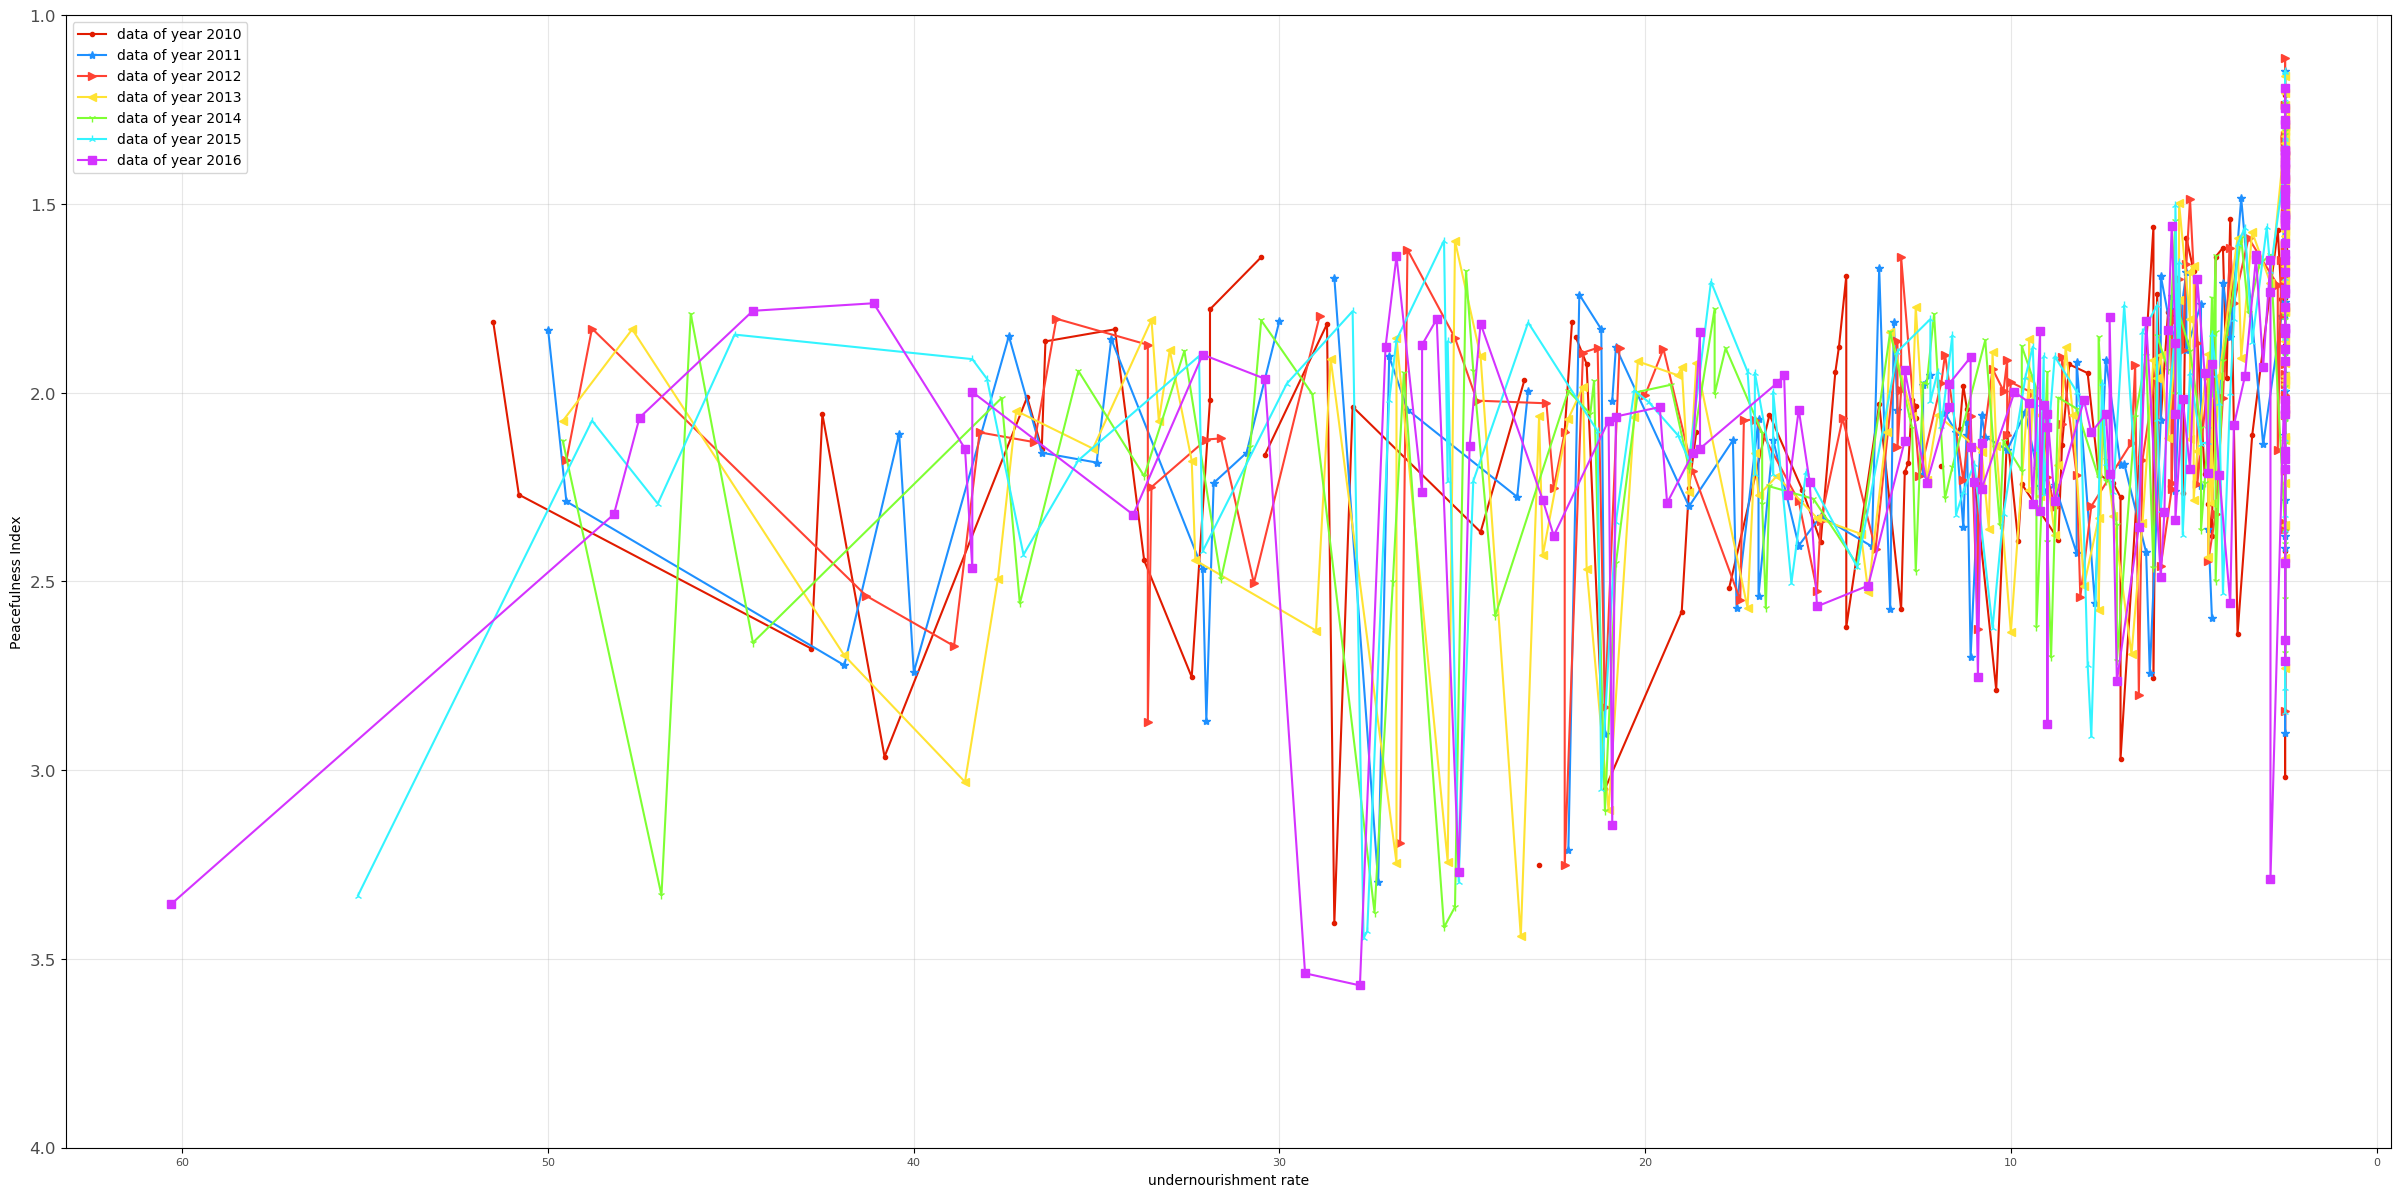

In [31]:
plot(x_list, y_list)

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = [['undernourishment_rate_2010','pi_2010'],['undernourishment_rate_2011','pi_2011'],
                  ['undernourishment_rate_2012','pi_2012'],['undernourishment_rate_2013','pi_2013'],
                  ['undernourishment_rate_2014','pi_2014'],['undernourishment_rate_2015','pi_2015'],
                  ['undernourishment_rate_2016','pi_2016']]
    x_item = ['[0,5)','[5,10)','[10,15)','[15,20)','[20,25)','[25,30)','[30,35)','[35,40)','[40,45)',
             '[45,50)']#,'[50+']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((10,2))
        for b in range(len(cc)):
            if cc[b] >= 0 and cc[b]<5:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 5 and cc[b]<10:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 10 and cc[b]<15:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 15 and cc[b]<20:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 20 and cc[b]<25:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 25 and cc[b]<30:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 30 and cc[b]<35:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 35 and cc[b]<40:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 40 and cc[b]<45:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 45 and cc[b]<50:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
#             if cc[b] >= 50:
#                 y_item[10][0] += cy[b]
#                 y_item[10][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()

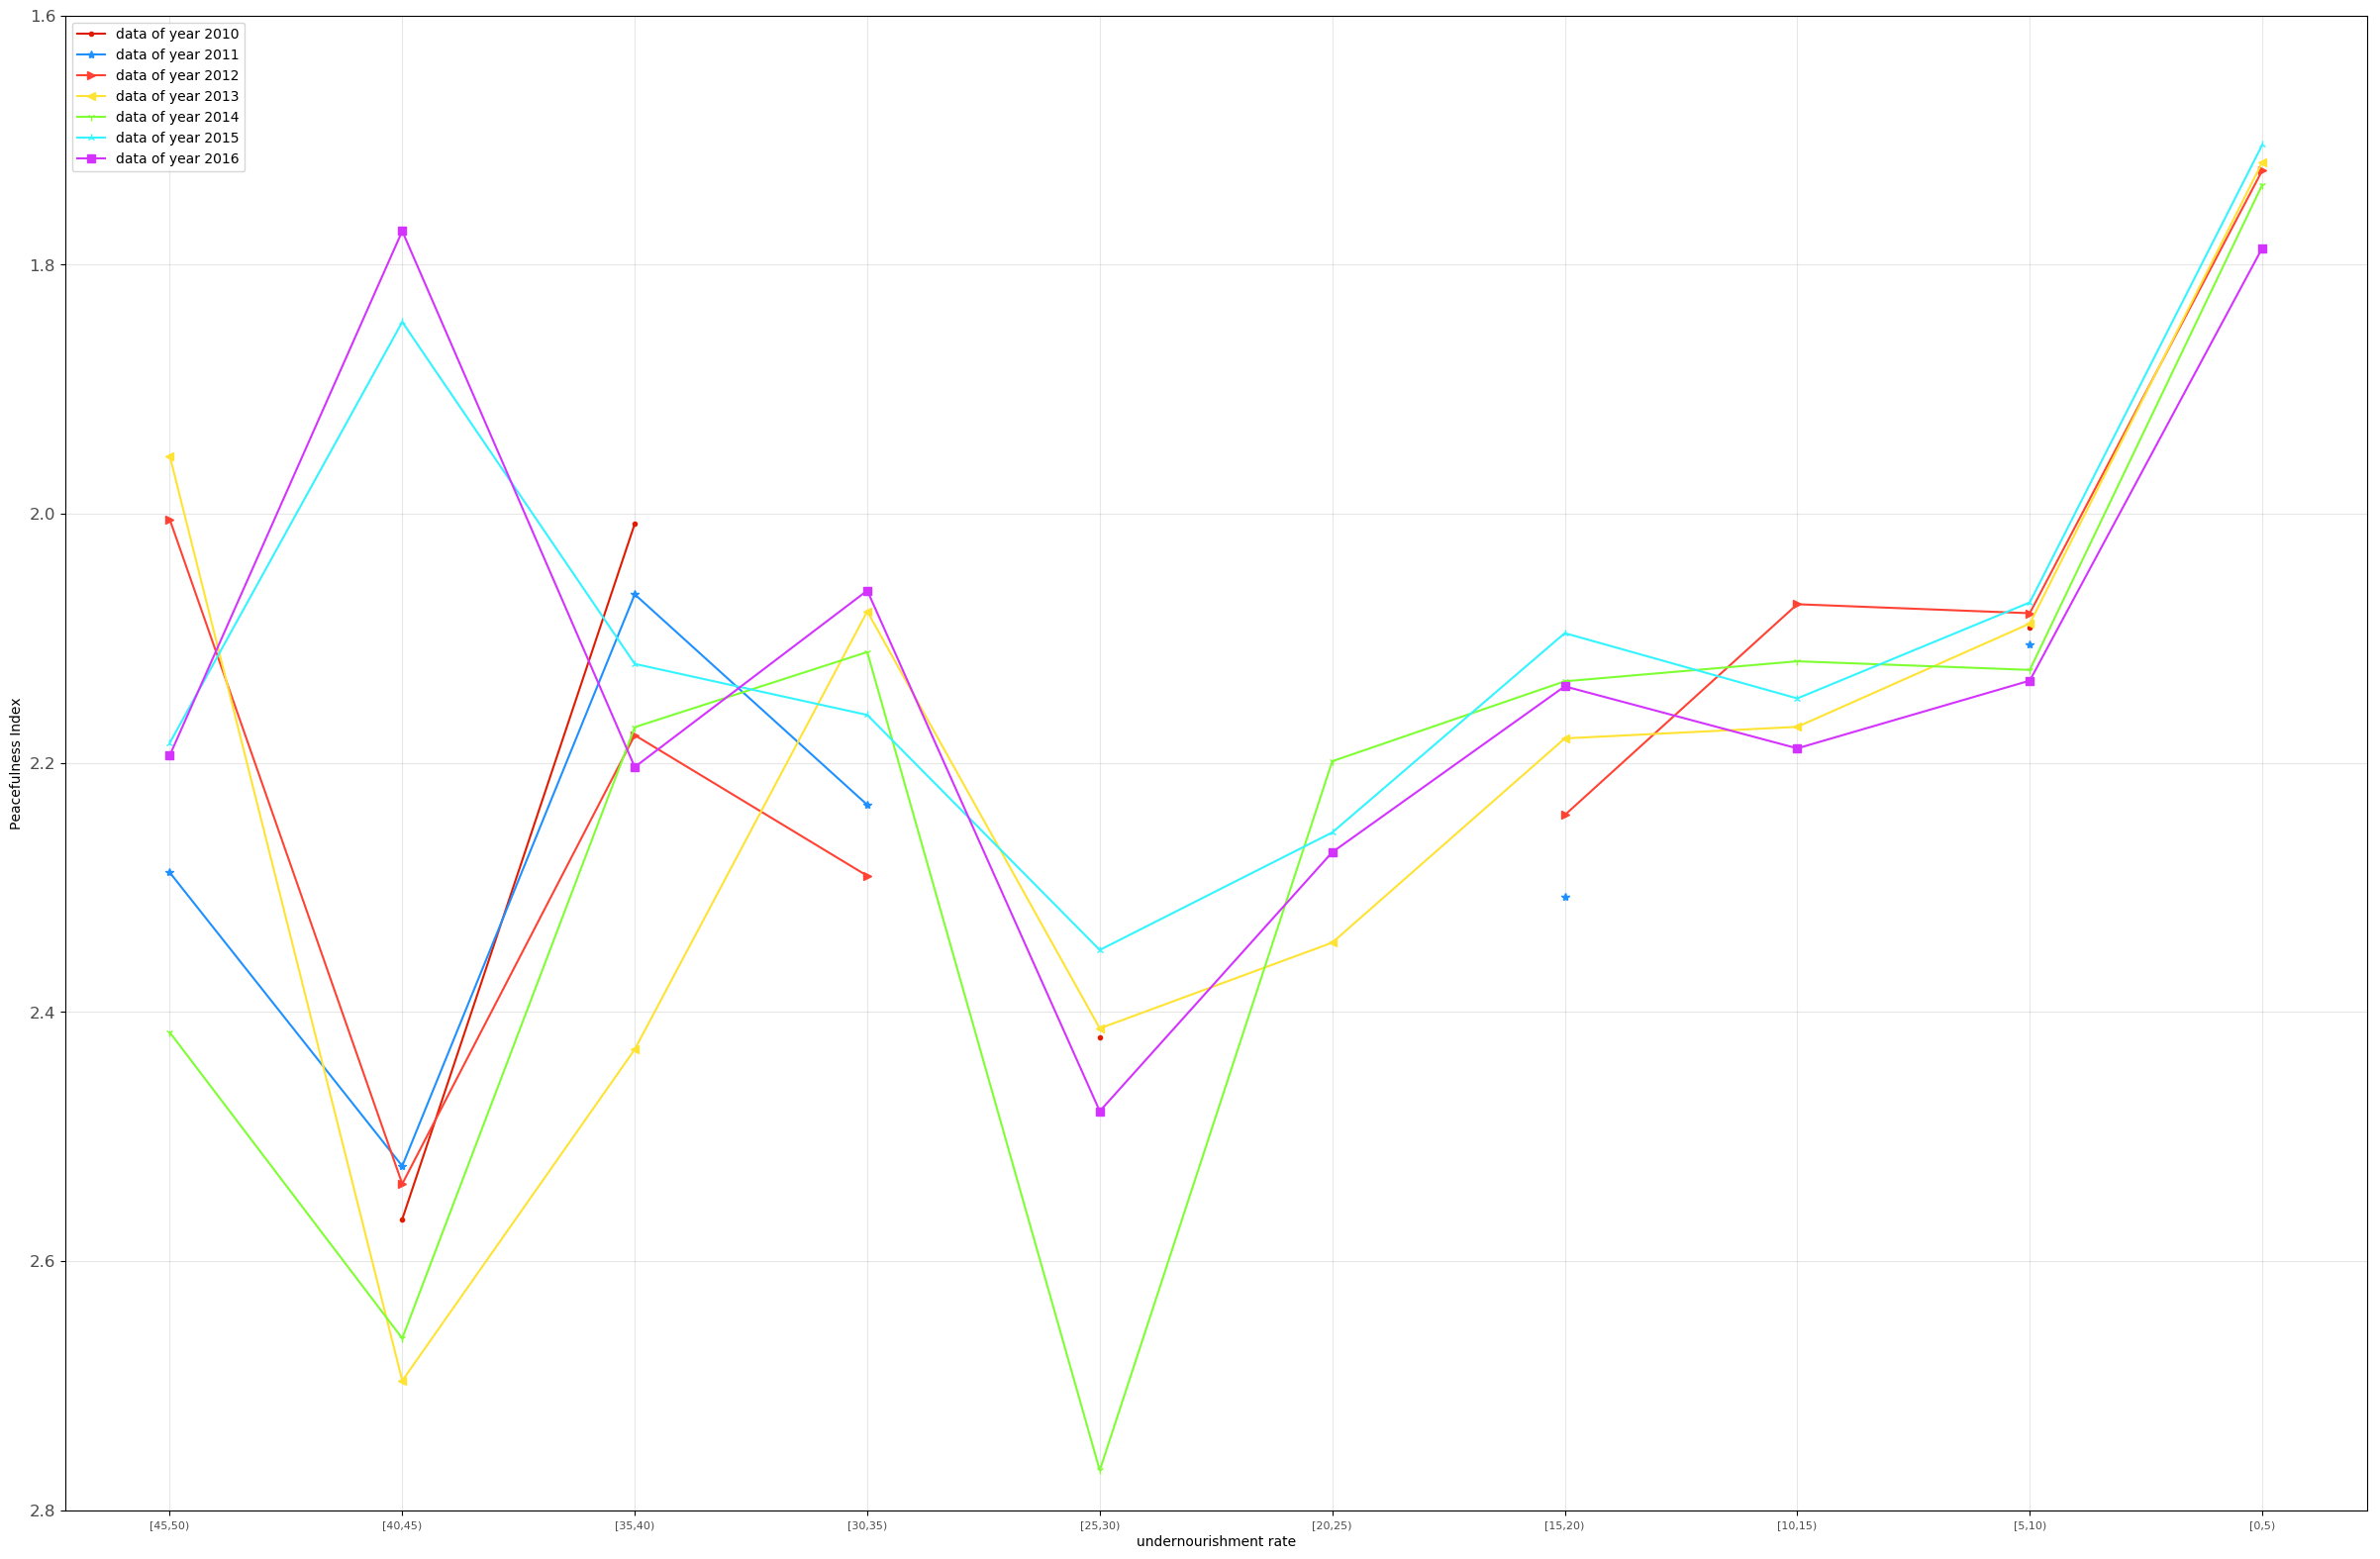

In [64]:
plot_cat(x_list, y_list)

## Part 2: Analysis of level 2-3, Safety-Belonging 


In [8]:
import pandas as pd

In [440]:
married = GET_DATA.marital()
married = married.astype({"Year": int}, copy = False)
def get_marriage_rate(married):
    # percent_married = pd.DataFrame()
    percent_married = []
    for i in range(8):
        total = married.loc[(married['Marital status']=='Total') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single = married.loc[(married['Marital status']=='Single (never married)') & (married['Age']=='Total')].groupby(['Year', 'Country or Area'], as_index=False).sum()
        single_pop = single[single['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        total_pop = total[total['Year'] == 2010+i].groupby(['Year', 'Country or Area']).sum()['Value']
        df1 = (total_pop-single_pop)/total_pop
        df = pd.concat([total_pop.to_frame().reset_index(), df1.to_frame().reset_index()['Value']],axis=1)
        df.columns = ['Year','Country','Total_pop','Marriage_Rate']
        percent_married.append(df)
    return percent_married

C:\Users\worawich-win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [36]:
percent_married = get_marriage_rate(married)

In [83]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def Analysis_two_third_level(peace, percent_married): 
    level2_list = []
    for i in range(8):
        df = percent_married[i]
        string = 'pi_'+str(2010+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level2 = pd.merge(df, p, on = 'Country', how='inner')
        level2_list.append(df_level2)
    x_list = []
    y_list = []
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
    for s in range(8):
        df = level2_list[s]
        dd = df.sort_values(by=[pi_list[s]], ascending=True)
        x = np.asarray(dd[pi_list[s]])
        y = np.asarray(dd['Marriage_Rate'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

In [84]:
x_list_level2, y_list_level2 = Analysis_two_third_level(peace, percent_married)

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_2(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s','3','4']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF','#3351FF','#D433FF']
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016','pi_2017','pi_2018']
    for f in range(8):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Marriage rate')
    plt.ylim(0,1)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.show()

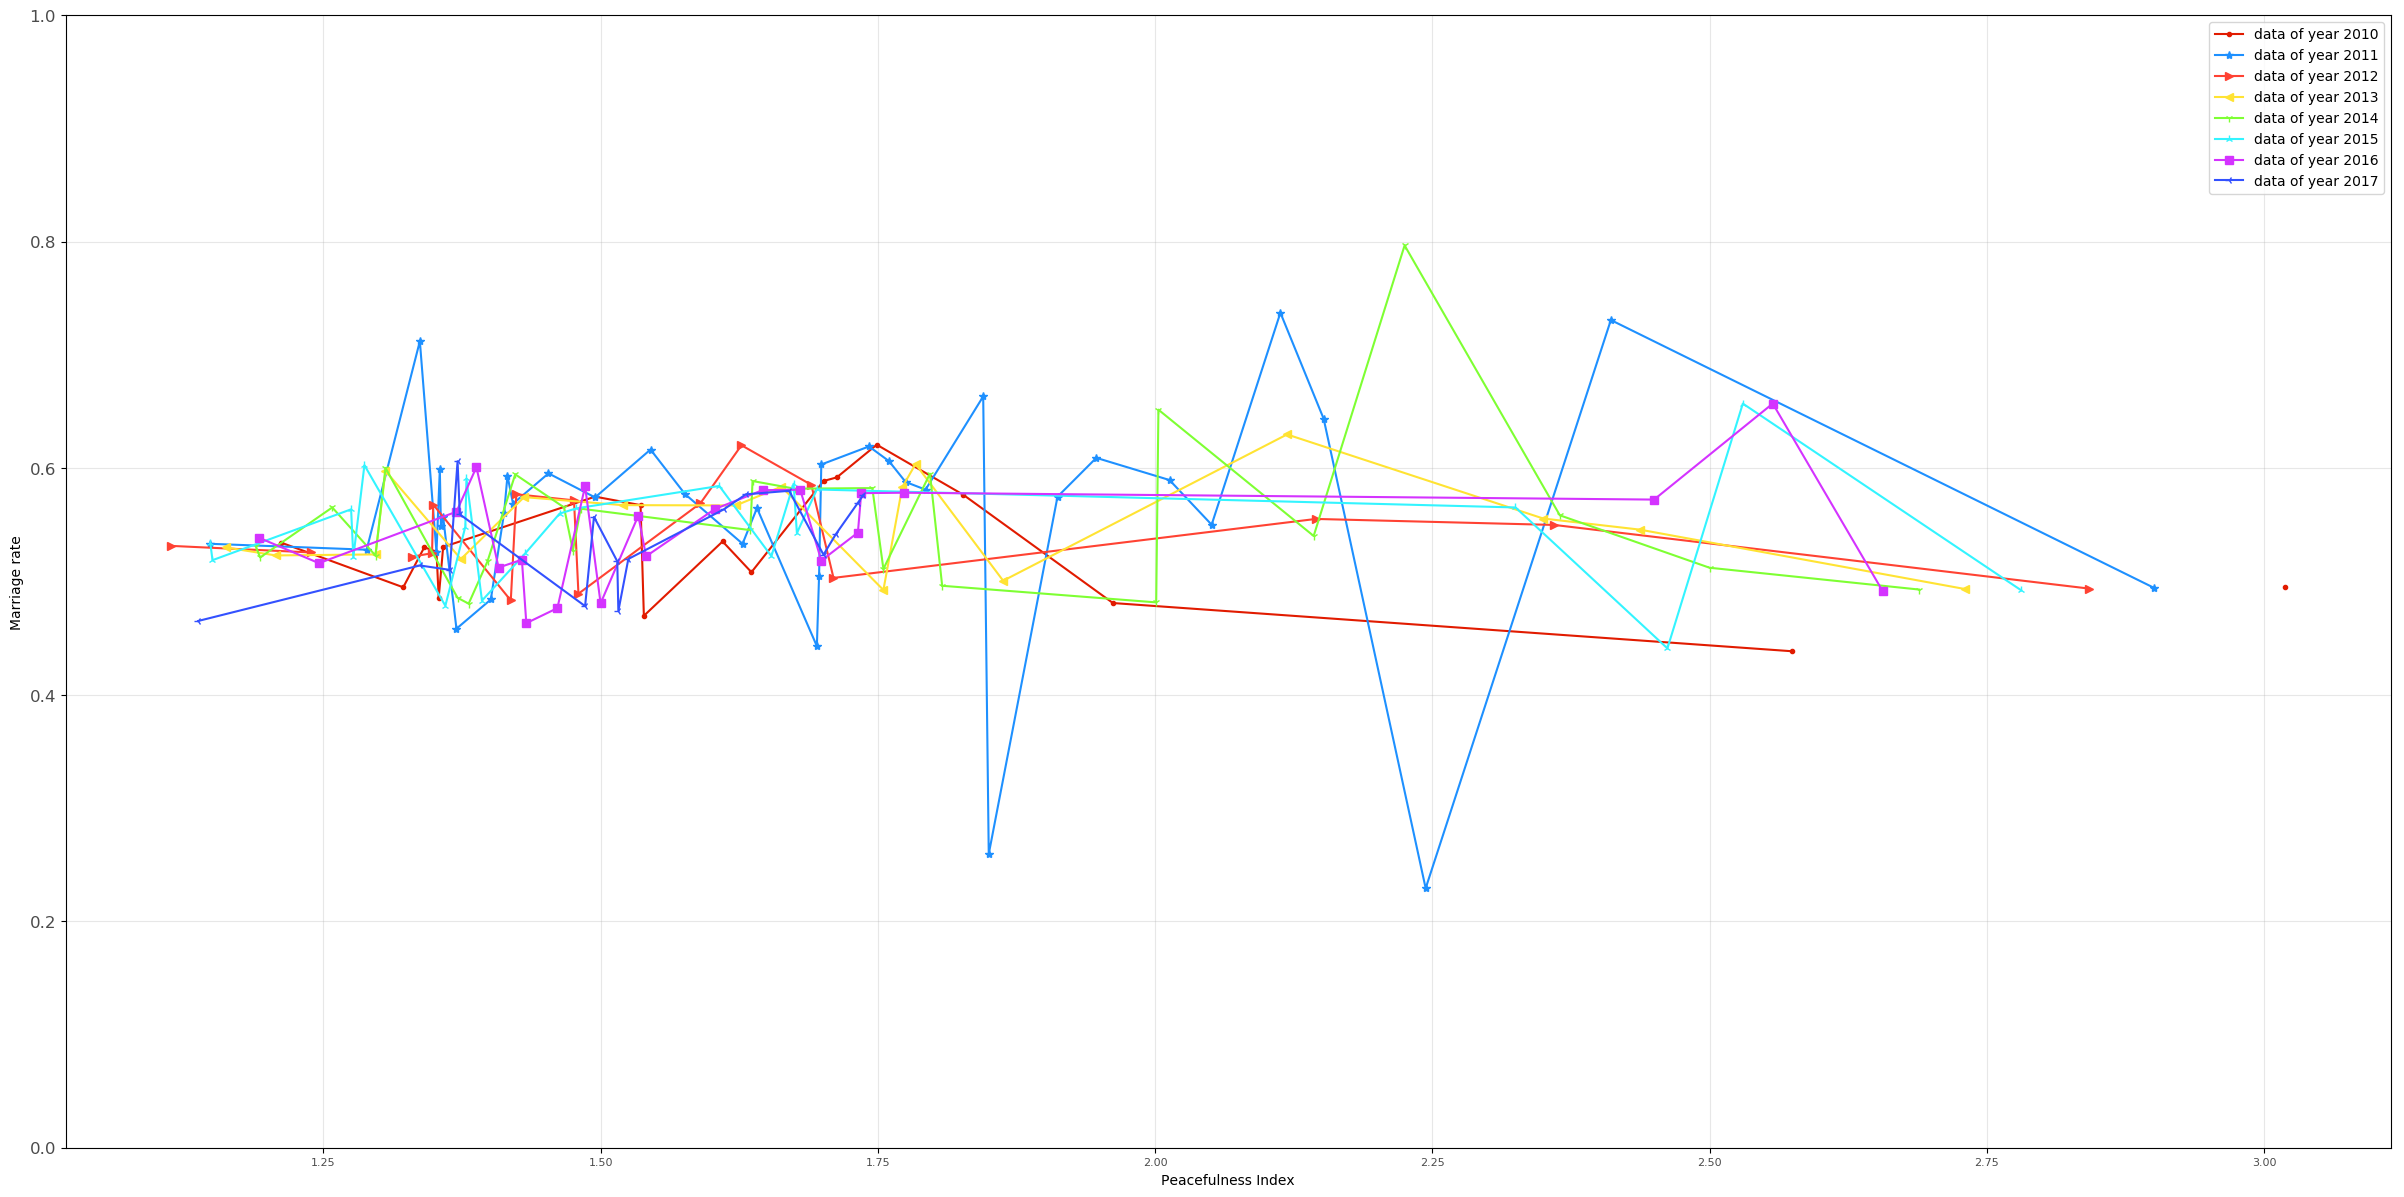

In [86]:
plot_level_2(x_list_level2, y_list_level2)

## Part 3: Analysis of level 2-4, Safety-Esteem 
by peace and freedom dataset

In [99]:
df_free = pd.concat([freedom['year'],freedom['countries'],freedom['hf_score']],axis=1)
df_free.columns = ['Year','Country','Human_Freedom_Score']

In [110]:
def Analysis_two_fourth_level(peace, df_free): 
    level24_list = []
    for i in range(6):
        df = df_free[df_free['Year']==(2010+i)]
        string = 'pi_'+str(2010+i)
        p1 = peace['Country']
        p2 = peace[string]   
        p = pd.concat([p1, p2],axis = 1)
        df_level24 = pd.merge(df, p, on = 'Country', how='inner')
        df_level24 = df_level24.drop_duplicates(keep='first', inplace=False)
        level24_list.append(df_level24)
    x_list = []
    y_list = []
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    for s in range(6):
        df = level24_list[s]
        dd = df.sort_values(by=[pi_list[s]], ascending=True)
        x = np.asarray(dd[pi_list[s]])
        y = np.asarray(dd['Human_Freedom_Score'])
        for j in range(x.shape[0]):
            if math.isnan(x[j]) == True:
                new_y = np.delete(y,j)
                new_x = np.delete(x,j)        
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

In [111]:
x_list_level24, y_list_level24 = Analysis_two_fourth_level(peace, df_free)

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_level_24(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    for f in range(6):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+pi_list[f][-4:], marker = marker[f],color = color[f])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Marriage rate')
    plt.ylim(4,9)
    plt.xlim(1,3.125)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

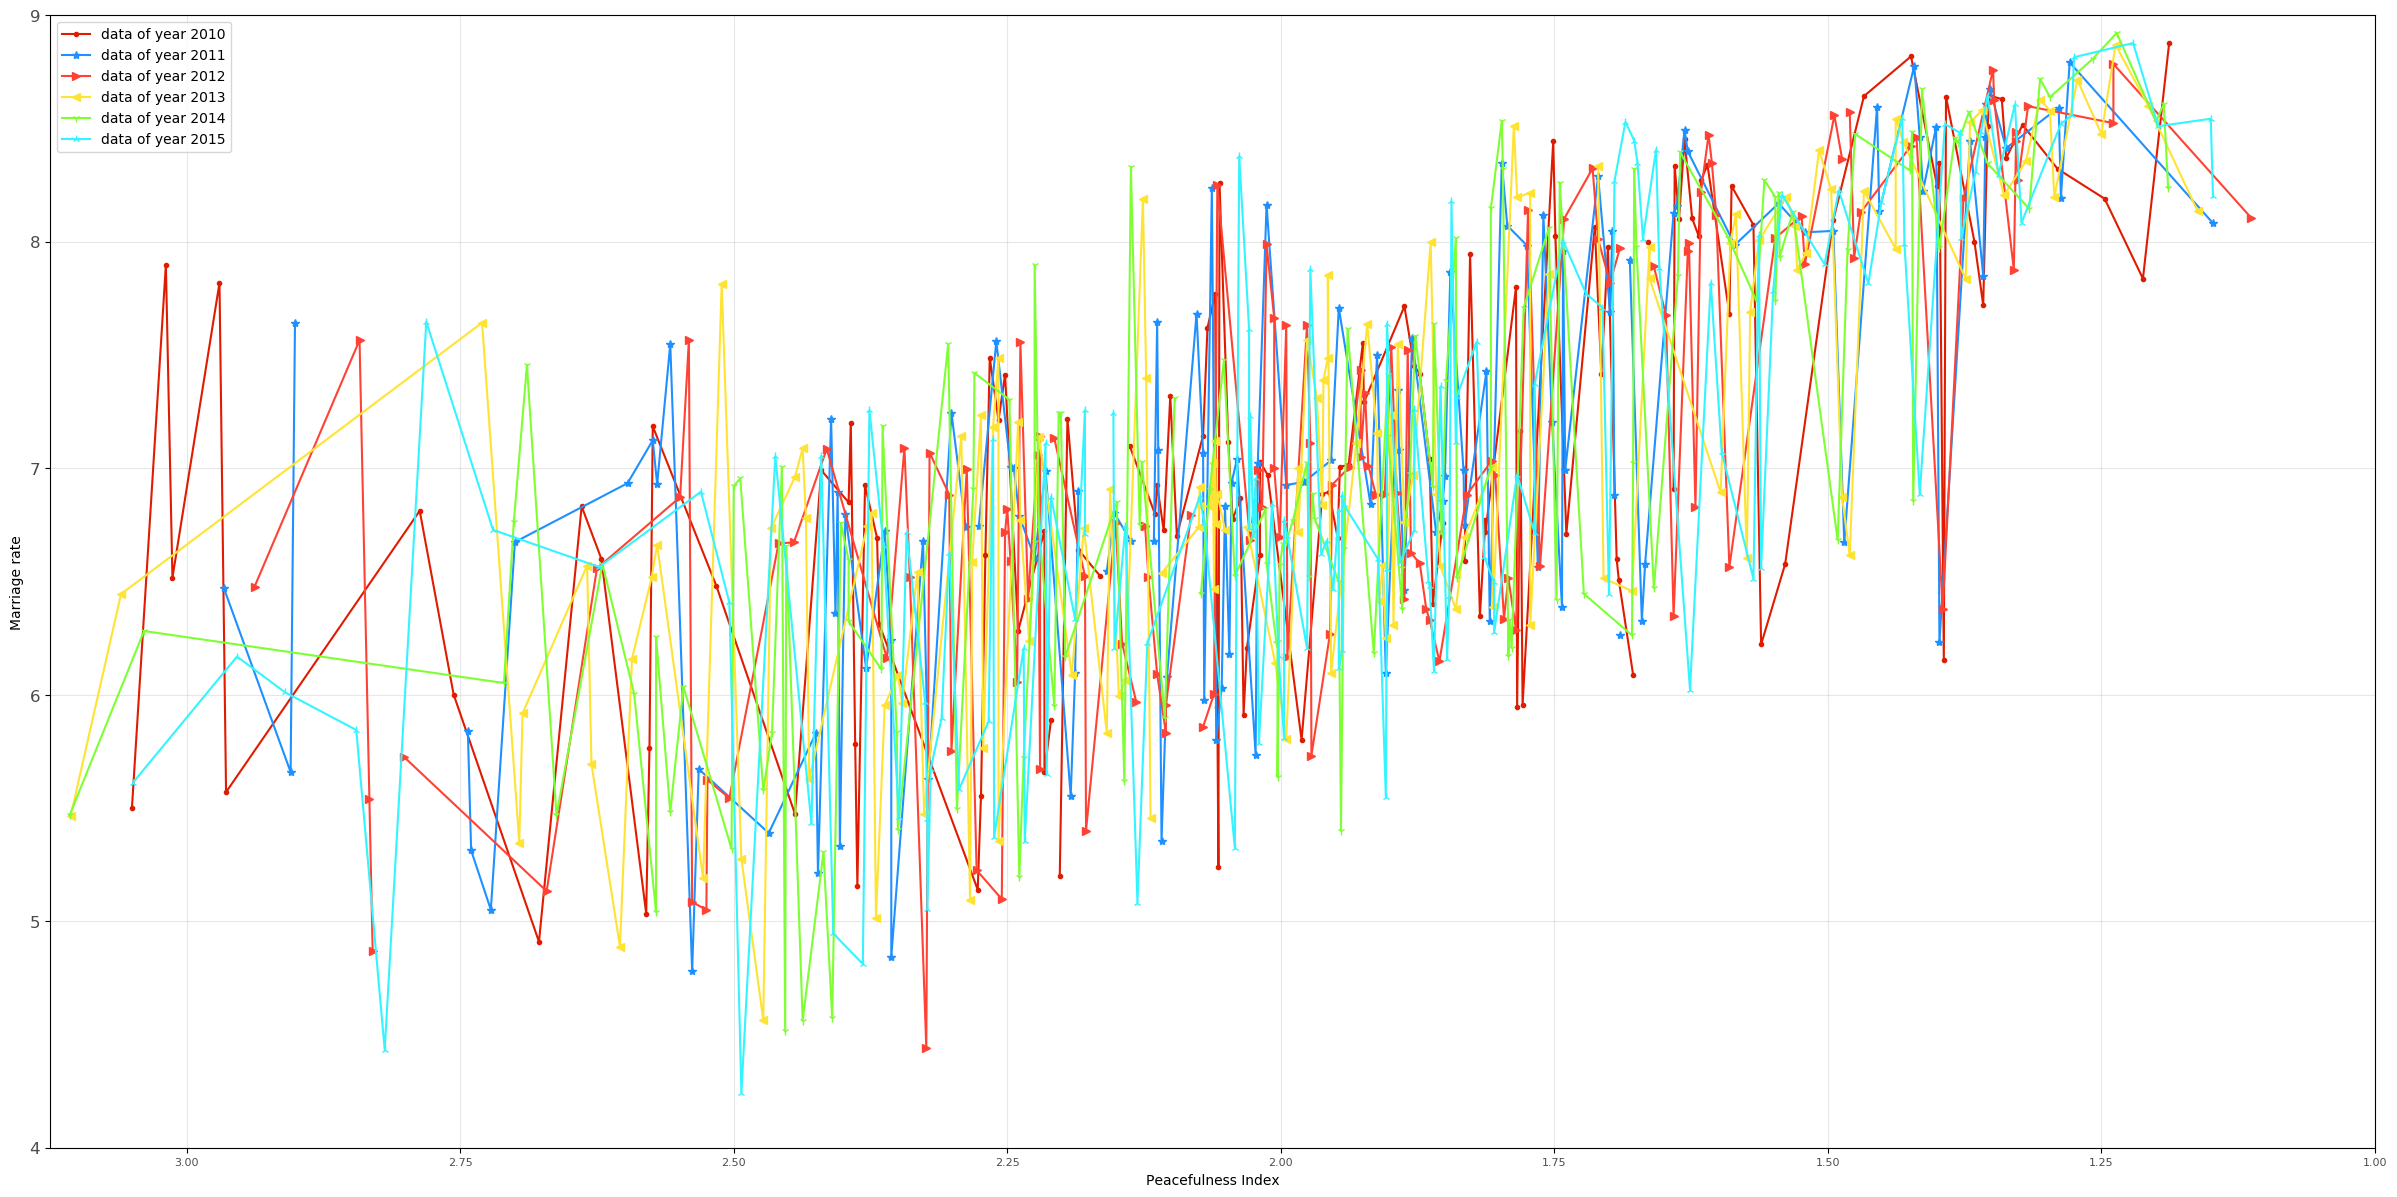

In [134]:
plot_level_24(x_list_level24, y_list_level24)

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_cat24(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    pi_list = ['pi_2010','pi_2011','pi_2012','pi_2013','pi_2014','pi_2015','pi_2016']
    x_item = ['[1,1.125)','[1.125,1.25)','[1.25,1.375)','[1.375,1.5)','[1.5,1.625)','[1.625,1.75)',
              '[1.75,1.875)','[1.875,2)','[2,2.125)', '[2,2.25)', '[2.25,2.375)', '[2.375,2.5)',
              '[2.5,2.625)', '[2.625,2.75)', '[2.75,2.875)', '[2.875,3)', '3+']
    marker = ['.','*','>','<','1','2','s',]
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((17,2))
        for b in range(len(cc)):
            if cc[b] >= 1 and cc[b]<1.125:
                y_item[0][0] += cy[b]
                y_item[0][1] += 1
            if cc[b] >= 1.125 and cc[b]<1.25:
                y_item[1][0] += cy[b]
                y_item[1][1] += 1
            if cc[b] >= 1.25 and cc[b]<1.375:
                y_item[2][0] += cy[b]
                y_item[2][1] += 1
            if cc[b] >= 1.375 and cc[b]<1.5:
                y_item[3][0] += cy[b]
                y_item[3][1] += 1
            if cc[b] >= 1.5 and cc[b]<1.625:
                y_item[4][0] += cy[b]
                y_item[4][1] += 1
            if cc[b] >= 1.625 and cc[b]<1.75:
                y_item[5][0] += cy[b]
                y_item[5][1] += 1
            if cc[b] >= 1.75 and cc[b]<1.875:
                y_item[6][0] += cy[b]
                y_item[6][1] += 1
            if cc[b] >= 1.875 and cc[b]<2:
                y_item[7][0] += cy[b]
                y_item[7][1] += 1
            if cc[b] >= 2 and cc[b]<2.125:
                y_item[8][0] += cy[b]
                y_item[8][1] += 1
            if cc[b] >= 2.125 and cc[b]<2.25:
                y_item[9][0] += cy[b]
                y_item[9][1] += 1
            if cc[b] >= 2.25 and cc[b]<2.375:
                y_item[10][0] += cy[b]
                y_item[10][1] += 1
            if cc[b] >= 2.375 and cc[b]<2.5:
                y_item[11][0] += cy[b]
                y_item[11][1] += 1
            if cc[b] >= 2.5 and cc[b]<2.625:
                y_item[12][0] += cy[b]
                y_item[12][1] += 1
            if cc[b] >= 2.625 and cc[b]<2.75:
                y_item[13][0] += cy[b]
                y_item[13][1] += 1
            if cc[b] >= 2.75 and cc[b]<2.875:
                y_item[14][0] += cy[b]
                y_item[14][1] += 1
            if cc[b] >= 2.875 and cc[b]<3:
                y_item[15][0] += cy[b]
                y_item[15][1] += 1
            if cc[b] >= 3:
                y_item[16][0] += cy[b]
                y_item[16][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+pi_list[s][1][-4:], marker = marker[s],color = color[s])
    plt.xlabel('Peacefulness Index')
    plt.ylabel('Human Freedom Score')
    #plt.ylim(1.6,2.8)
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()
    plt.gca().invert_xaxis()
    plt.show()

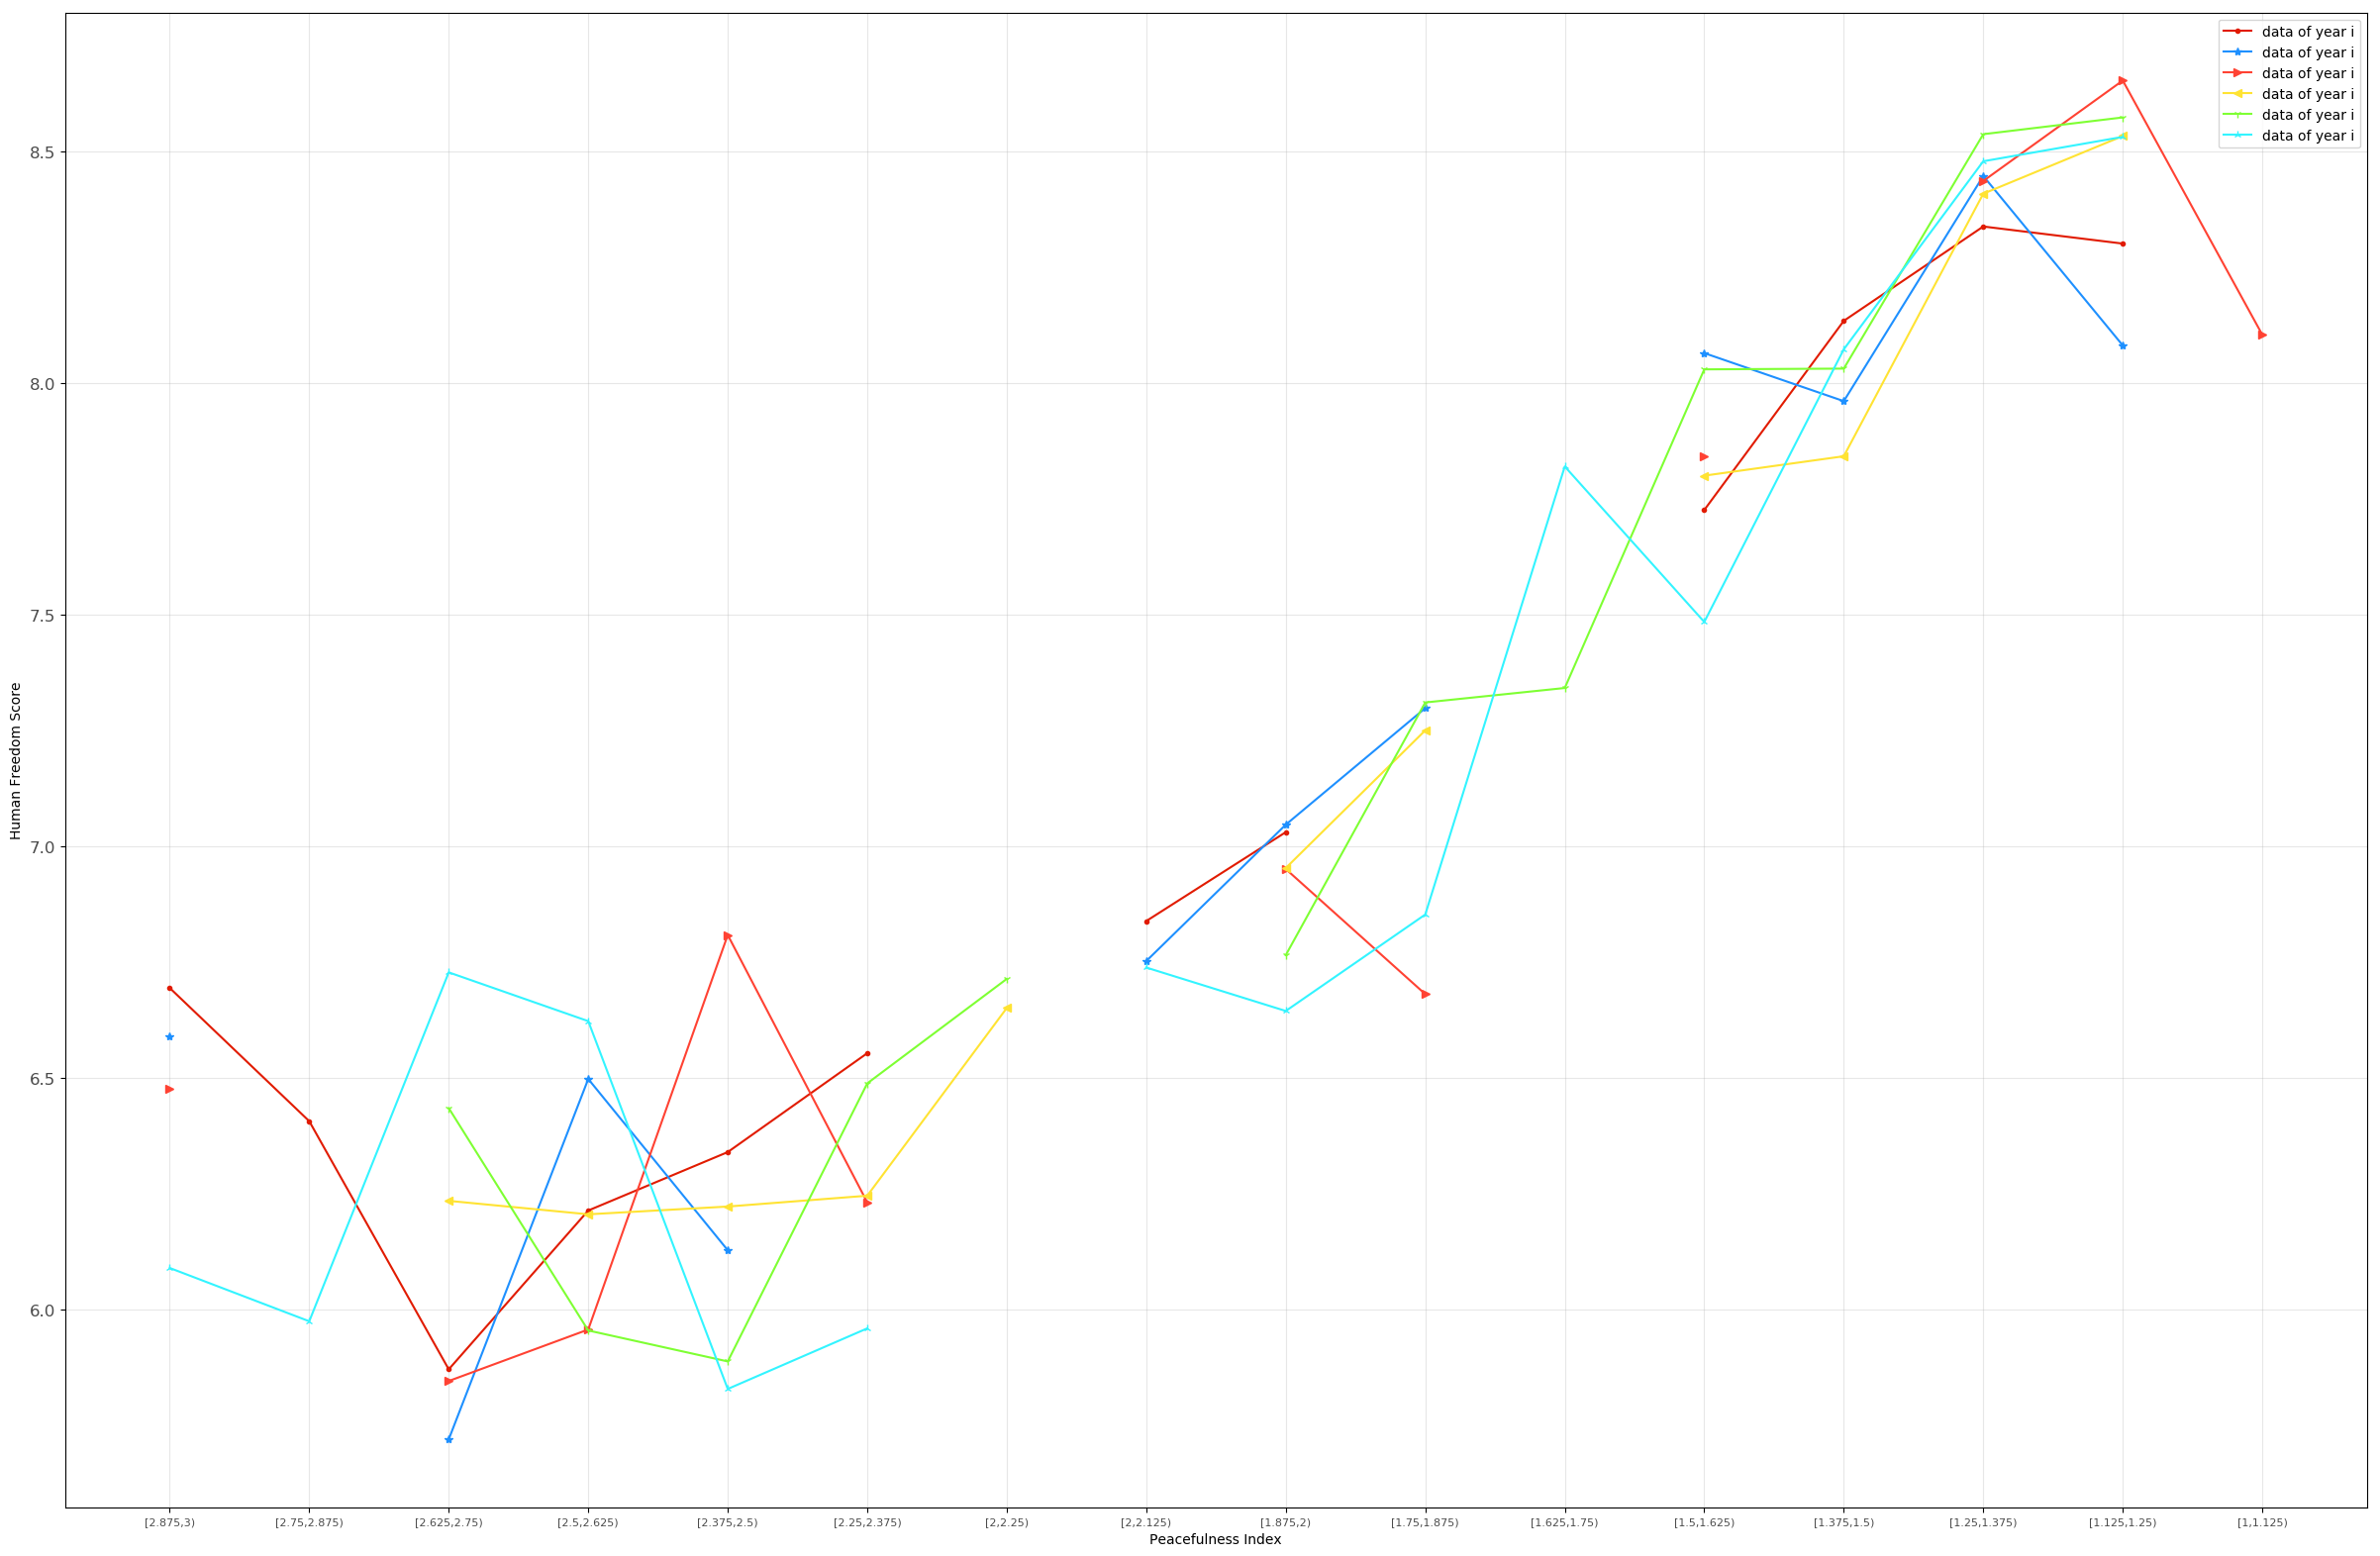

In [128]:
plot_cat24(x_list_level24, y_list_level24)

## Part 4: Analysis of level 4-5, Esteem-Self Actualization 
by freedom and innovation dataset

In [389]:
free_list = PREP_DATA.freedom()

C:\Users\worawich-win\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\worawich-win\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\worawich-win\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(Da

In [375]:
inno_list = []
for i in range(6):
    df = GET_DATA.Innovation('Innovation-201%s.csv' %(i+3))
    df.rename({'Economy':'Country','Score': 'Score201%s' %(i+3)}, axis='columns', inplace=True)
    inno_list.append(df[['Country','Score201%s' %(i+3)]])

In [376]:
def Analysis_level45(inno_list, free_list): 
    level_45_list = []
    for i in range(4):
        df_level45 = pd.merge(inno_list[i], free_list[i], on = 'Country', how='inner')
        df_level45 = df_level45.drop_duplicates(keep='first', inplace=False)
        level_45_list.append(df_level45)
    x_list = []
    y_list = []
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    for s in range(4):
        df = level_45_list[s]
        dd = df.sort_values(by='hf_score', ascending=True)
        x = np.asarray(dd['hf_score'])
        y = np.asarray(dd[item[s]])
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

In [435]:
def plot45(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][-4:], marker = marker[f])#,color = color[f])
    plt.xlabel('Freedom Index')
    plt.ylabel('Innovation Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()#prop={'size': 30})
    plt.show()

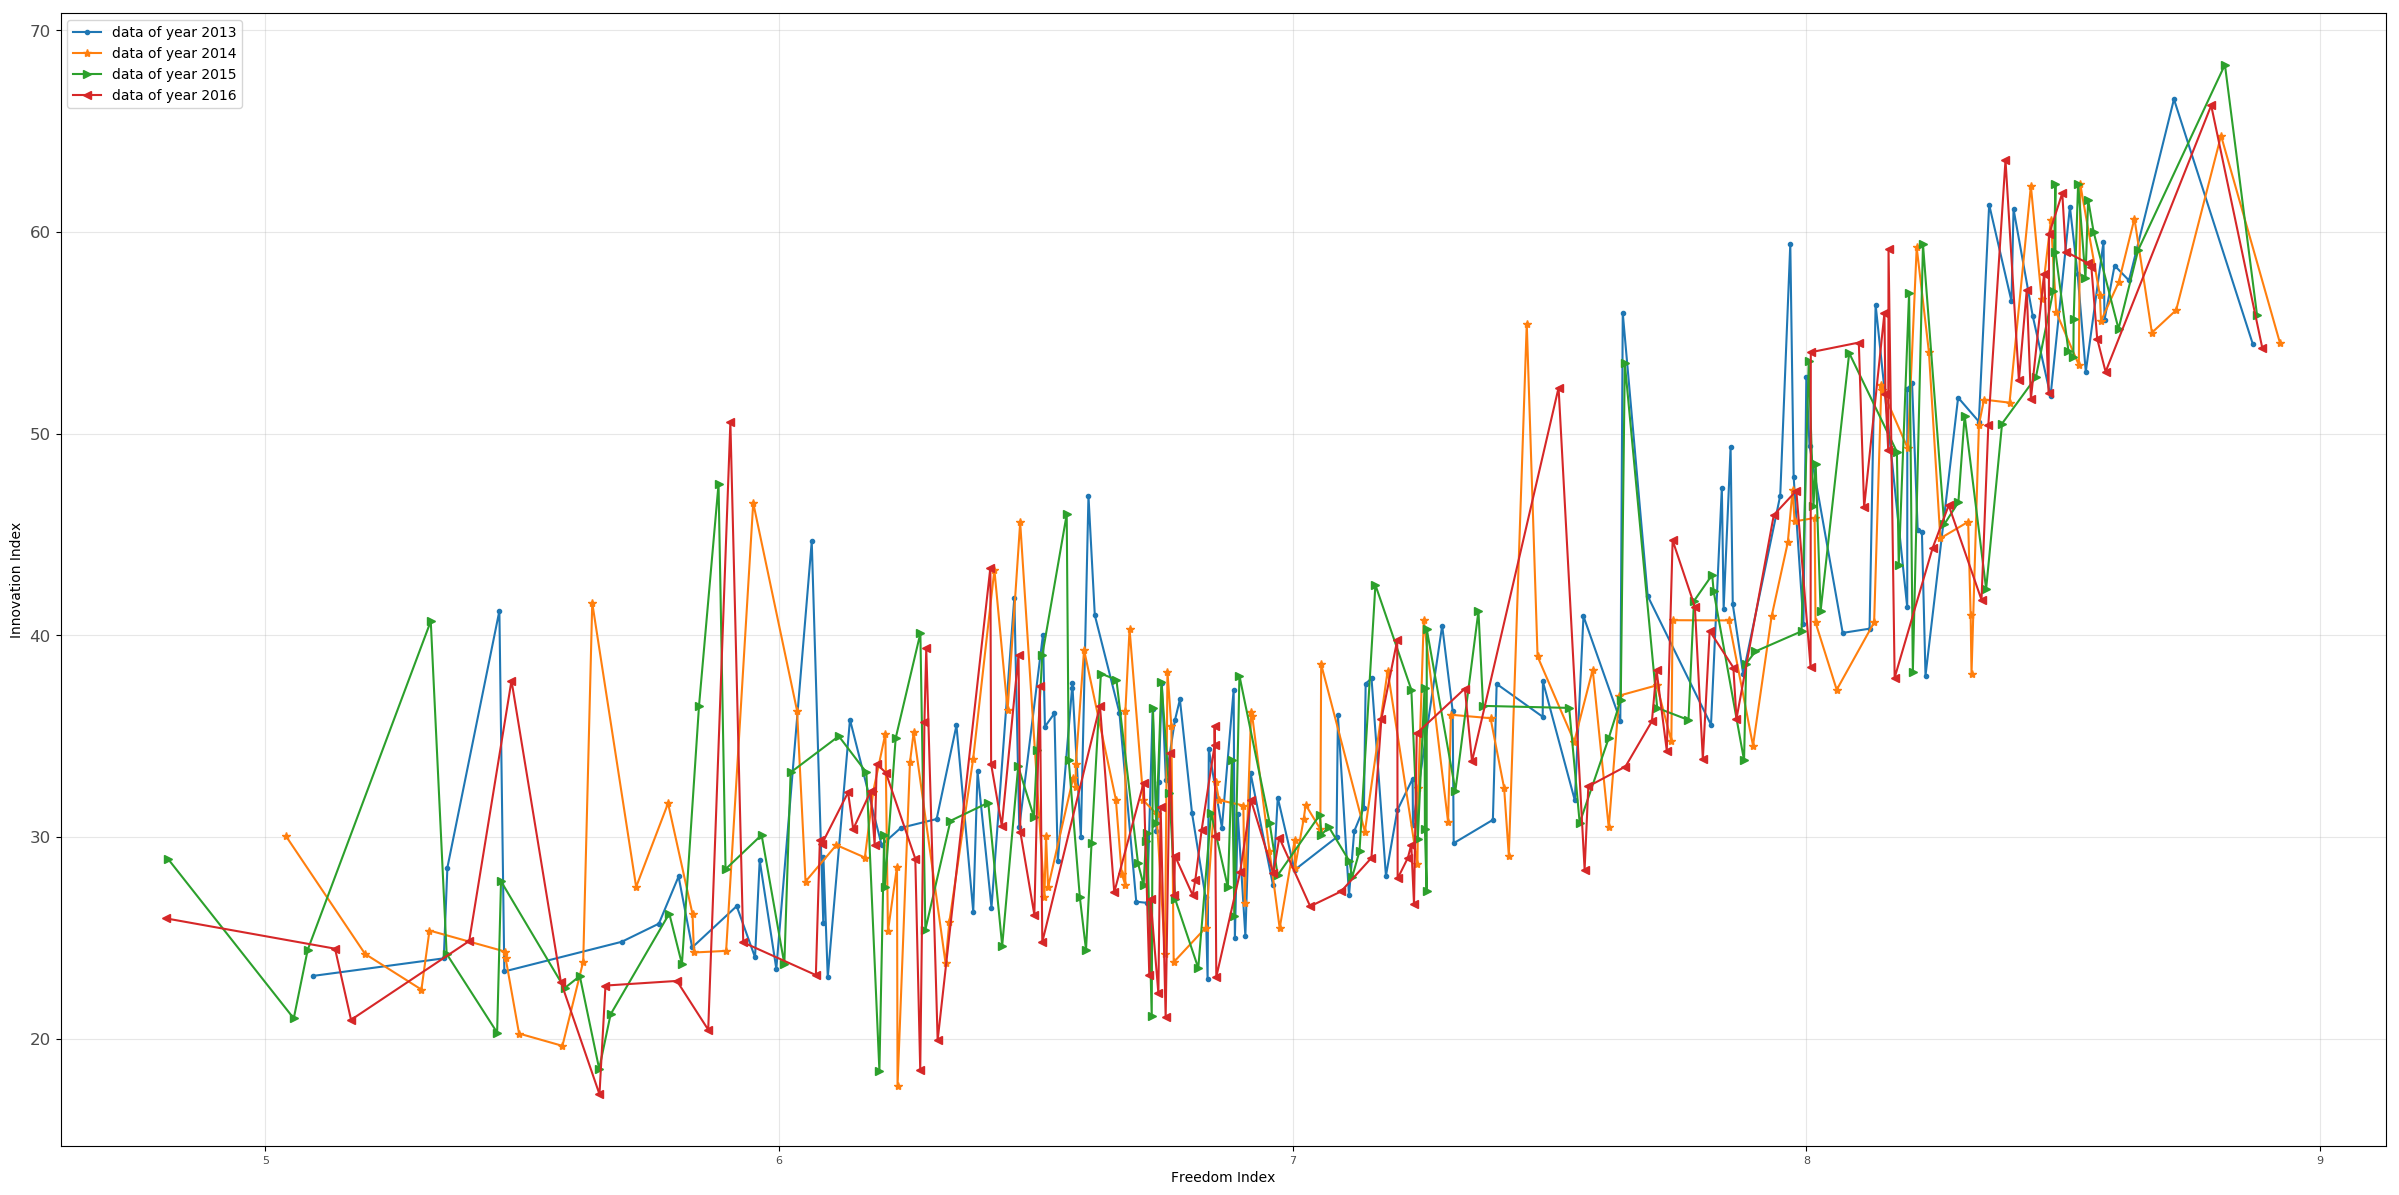

In [436]:
x_list, y_list = Analysis_level45(inno_list, free_list)
plot45(x_list, y_list)

In [437]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot45_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = ['Score2013', 'Score2014', 'Score2015', 'Score2016']
    start = 4.5
    end = 9
    range_interval = 9
    interval = (end-start)/range_interval
    x_item = []
    for j in range(range_interval):
        x_item.append('[%s,%s)' %(start+(interval*j), start+(interval*(j+1))))
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((range_interval,2))
        for b in range(len(cc)):
            for k in range(10):
                if cc[b] >= (start+(interval*k)) and cc[b] < (start+(interval*(k+1))):
                    y_item[k][0] += cy[b]
                    y_item[k][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][-4:], marker = marker[s],color = color[s])
    plt.xlabel('Freedom Index')
    plt.ylabel('Innovation Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend()#prop={'size': 30})
    plt.show()

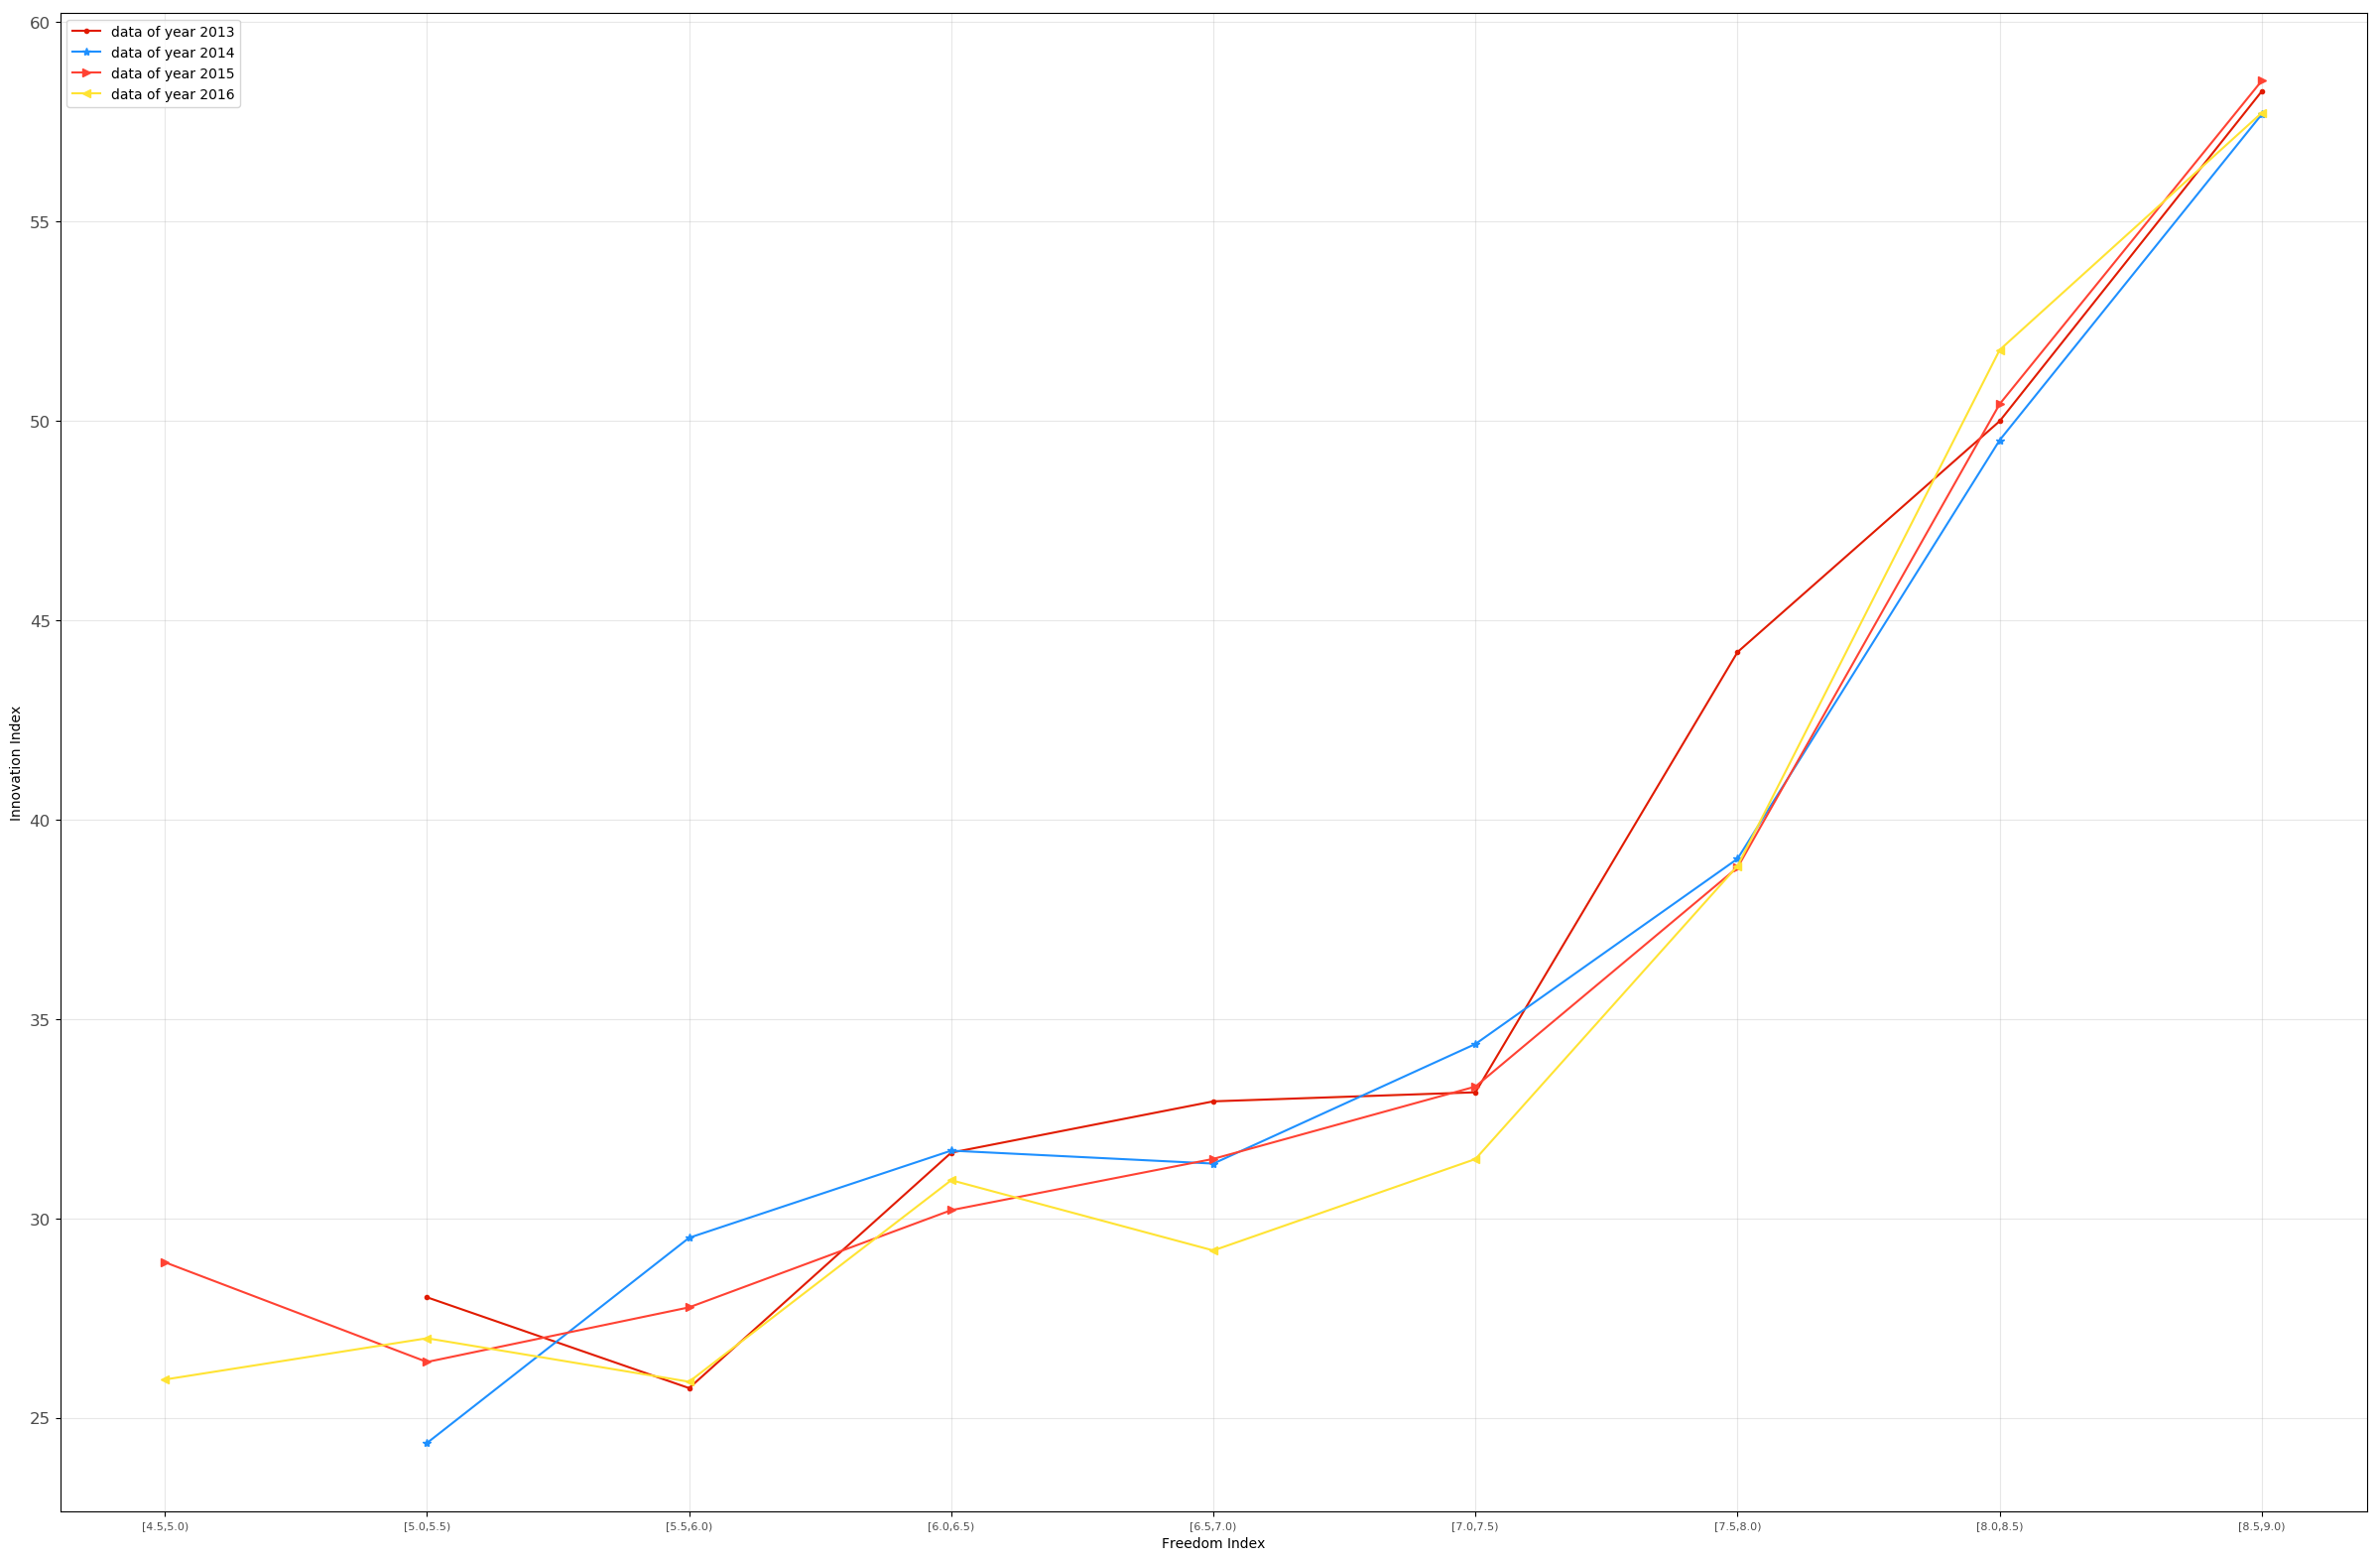

In [438]:
plot45_cat(x_list, y_list)

## Part 5: Analysis of level 3-4, Belonging-Esteem 
by married + freedom index dataset

In [429]:
peace = GET_DATA.Peace(None)
peace_list = []
for i in range(4):
    peace_list.append(peace[['Country','pi_201%s' %(i+3)]])
peace_list

[                              Country  pi_2013
 0                             Iceland    1.162
 1                         New Zealand    1.237
 2                             Austria    1.250
 3                            Portugal    1.467
 4                             Denmark    1.207
 5                              Canada    1.306
 6                      Czech Republic    1.404
 7                           Singapore    1.438
 8                               Japan    1.293
 9                             Ireland    1.370
 10                           Slovenia    1.374
 11                        Switzerland    1.272
 12                          Australia    1.438
 13                             Sweden    1.319
 14                            Finland    1.297
 15                             Norway    1.359
 16                            Germany    1.431
 17                            Hungary    1.520
 18                             Bhutan    1.487
 19                          Mauritius  

In [415]:
free_list = PREP_DATA.freedom()
free_list

C:\Users\worawich-win\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\worawich-win\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\worawich-win\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(Da

[      year            Country  hf_score
 3     2013              Syria  4.095028
 14    2013               Iran  4.563809
 24    2013        Yemen, Rep.  4.812705
 29    2013              Libya  4.887965
 30    2013     Congo, Dem. R.  4.907996
 37    2013          Venezuela  5.013857
 47    2013            Algeria  5.093421
 58    2013            Myanmar  5.190548
 68    2013               Chad  5.275264
 73    2013  Central Afr. Rep.  5.300177
 82    2013           Zimbabwe  5.347535
 86    2013              Egypt  5.354585
 106   2013       Saudi Arabia  5.455760
 109   2013           Pakistan  5.465421
 115   2013         Mauritania  5.474042
 140   2013      Guinea-Bissau  5.627786
 152   2013     Congo, Rep. Of  5.664823
 162   2013           Ethiopia  5.693807
 174   2013             Guinea  5.766187
 185   2013              Gabon  5.804573
 189   2013         Bangladesh  5.831064
 215   2013            Nigeria  5.917728
 224   2013              Niger  5.953386
 230   2013     

In [426]:
def Analysis_level24(peace_list, free_list): 
    level_24_list = []
    for i in range(4):
        df_level24 = pd.merge(peace_list[i], free_list[i], on = 'Country', how='inner')
        df_level24 = df_level24.drop_duplicates(keep='first', inplace=False)
        level_24_list.append(df_level24)
    x_list = []
    y_list = []
    item = ['pi2013', 'pi2014', 'pi2015', 'pi2016']
    for s in range(4):
        df = level_24_list[s]
        dd = df.sort_values(by='hf_score', ascending=True)
        x = np.asarray(dd['hf_score'])
        y = np.asarray(dd[item[s]])
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

In [427]:
def plot24(x_list, y_list):
    plt.figure(figsize = (30,15), dpi=100)
    item = ['pi2013', 'pi2014', 'pi2015', 'pi2016']
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    for f in range(len(x_list)):
        plt.plot(x_list[f],y_list[f],label = 'data of year '+item[f][-4:], marker = marker[f])#,color = color[f])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend(prop={'size': 30})
    plt.show()

In [428]:
x_list, y_list = Analysis_level24(peace_list, free_list)
plot24(x_list, y_list)

KeyError: 'pi2013'

In [424]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot24_cat(x_list, y_list):
    plt.figure(figsize = (30,20), dpi=100)
    item = ['pi2013', 'pi2014', 'pi2015', 'pi2016']
    start = 4.5
    end = 9
    range_interval = 9
    interval = (end-start)/range_interval
    x_item = []
    for j in range(range_interval):
        x_item.append('[%s,%s)' %(start+(interval*j), start+(interval*(j+1))))
    marker = ['.','*','>','<','1','2','s']
    color = ['#E11B00', '#1E90FF','#FF4233','#FFE333','#7EFF33','#33F4FF','#D433FF']
    y_new_list = []
    for a in range(len(x_list)):
        cc = x_list[a]
        cy = y_list[a]
        y_item = np.zeros((range_interval,2))
        for b in range(len(cc)):
            for k in range(10):
                if cc[b] >= (start+(interval*k)) and cc[b] < (start+(interval*(k+1))):
                    y_item[k][0] += cy[b]
                    y_item[k][1] += 1
        y_new = np.zeros(y_item.shape[0])
        for c in range(y_item.shape[0]):
            if y_item[c][1] == 0:
                y_new[c] = math.nan
            else:
                y_new[c] = y_item[c][0]/y_item[c][1]
        y_new_list.append(y_new)
    for s in range(len(y_new_list)):
        plt.plot(x_item,y_new_list[s],label = 'data of year '+item[s][-4:], marker = marker[s],color = color[s])
    plt.xlabel('undernourishment rate')
    plt.ylabel('Peacefulness Index')
    plt.xticks(fontsize = 8, horizontalalignment = 'center', alpha = .7)
    plt.yticks(fontsize = 12, alpha = .7)
    plt.grid(axis='both',alpha = .3)
    plt.legend(prop={'size': 30})
    plt.show()

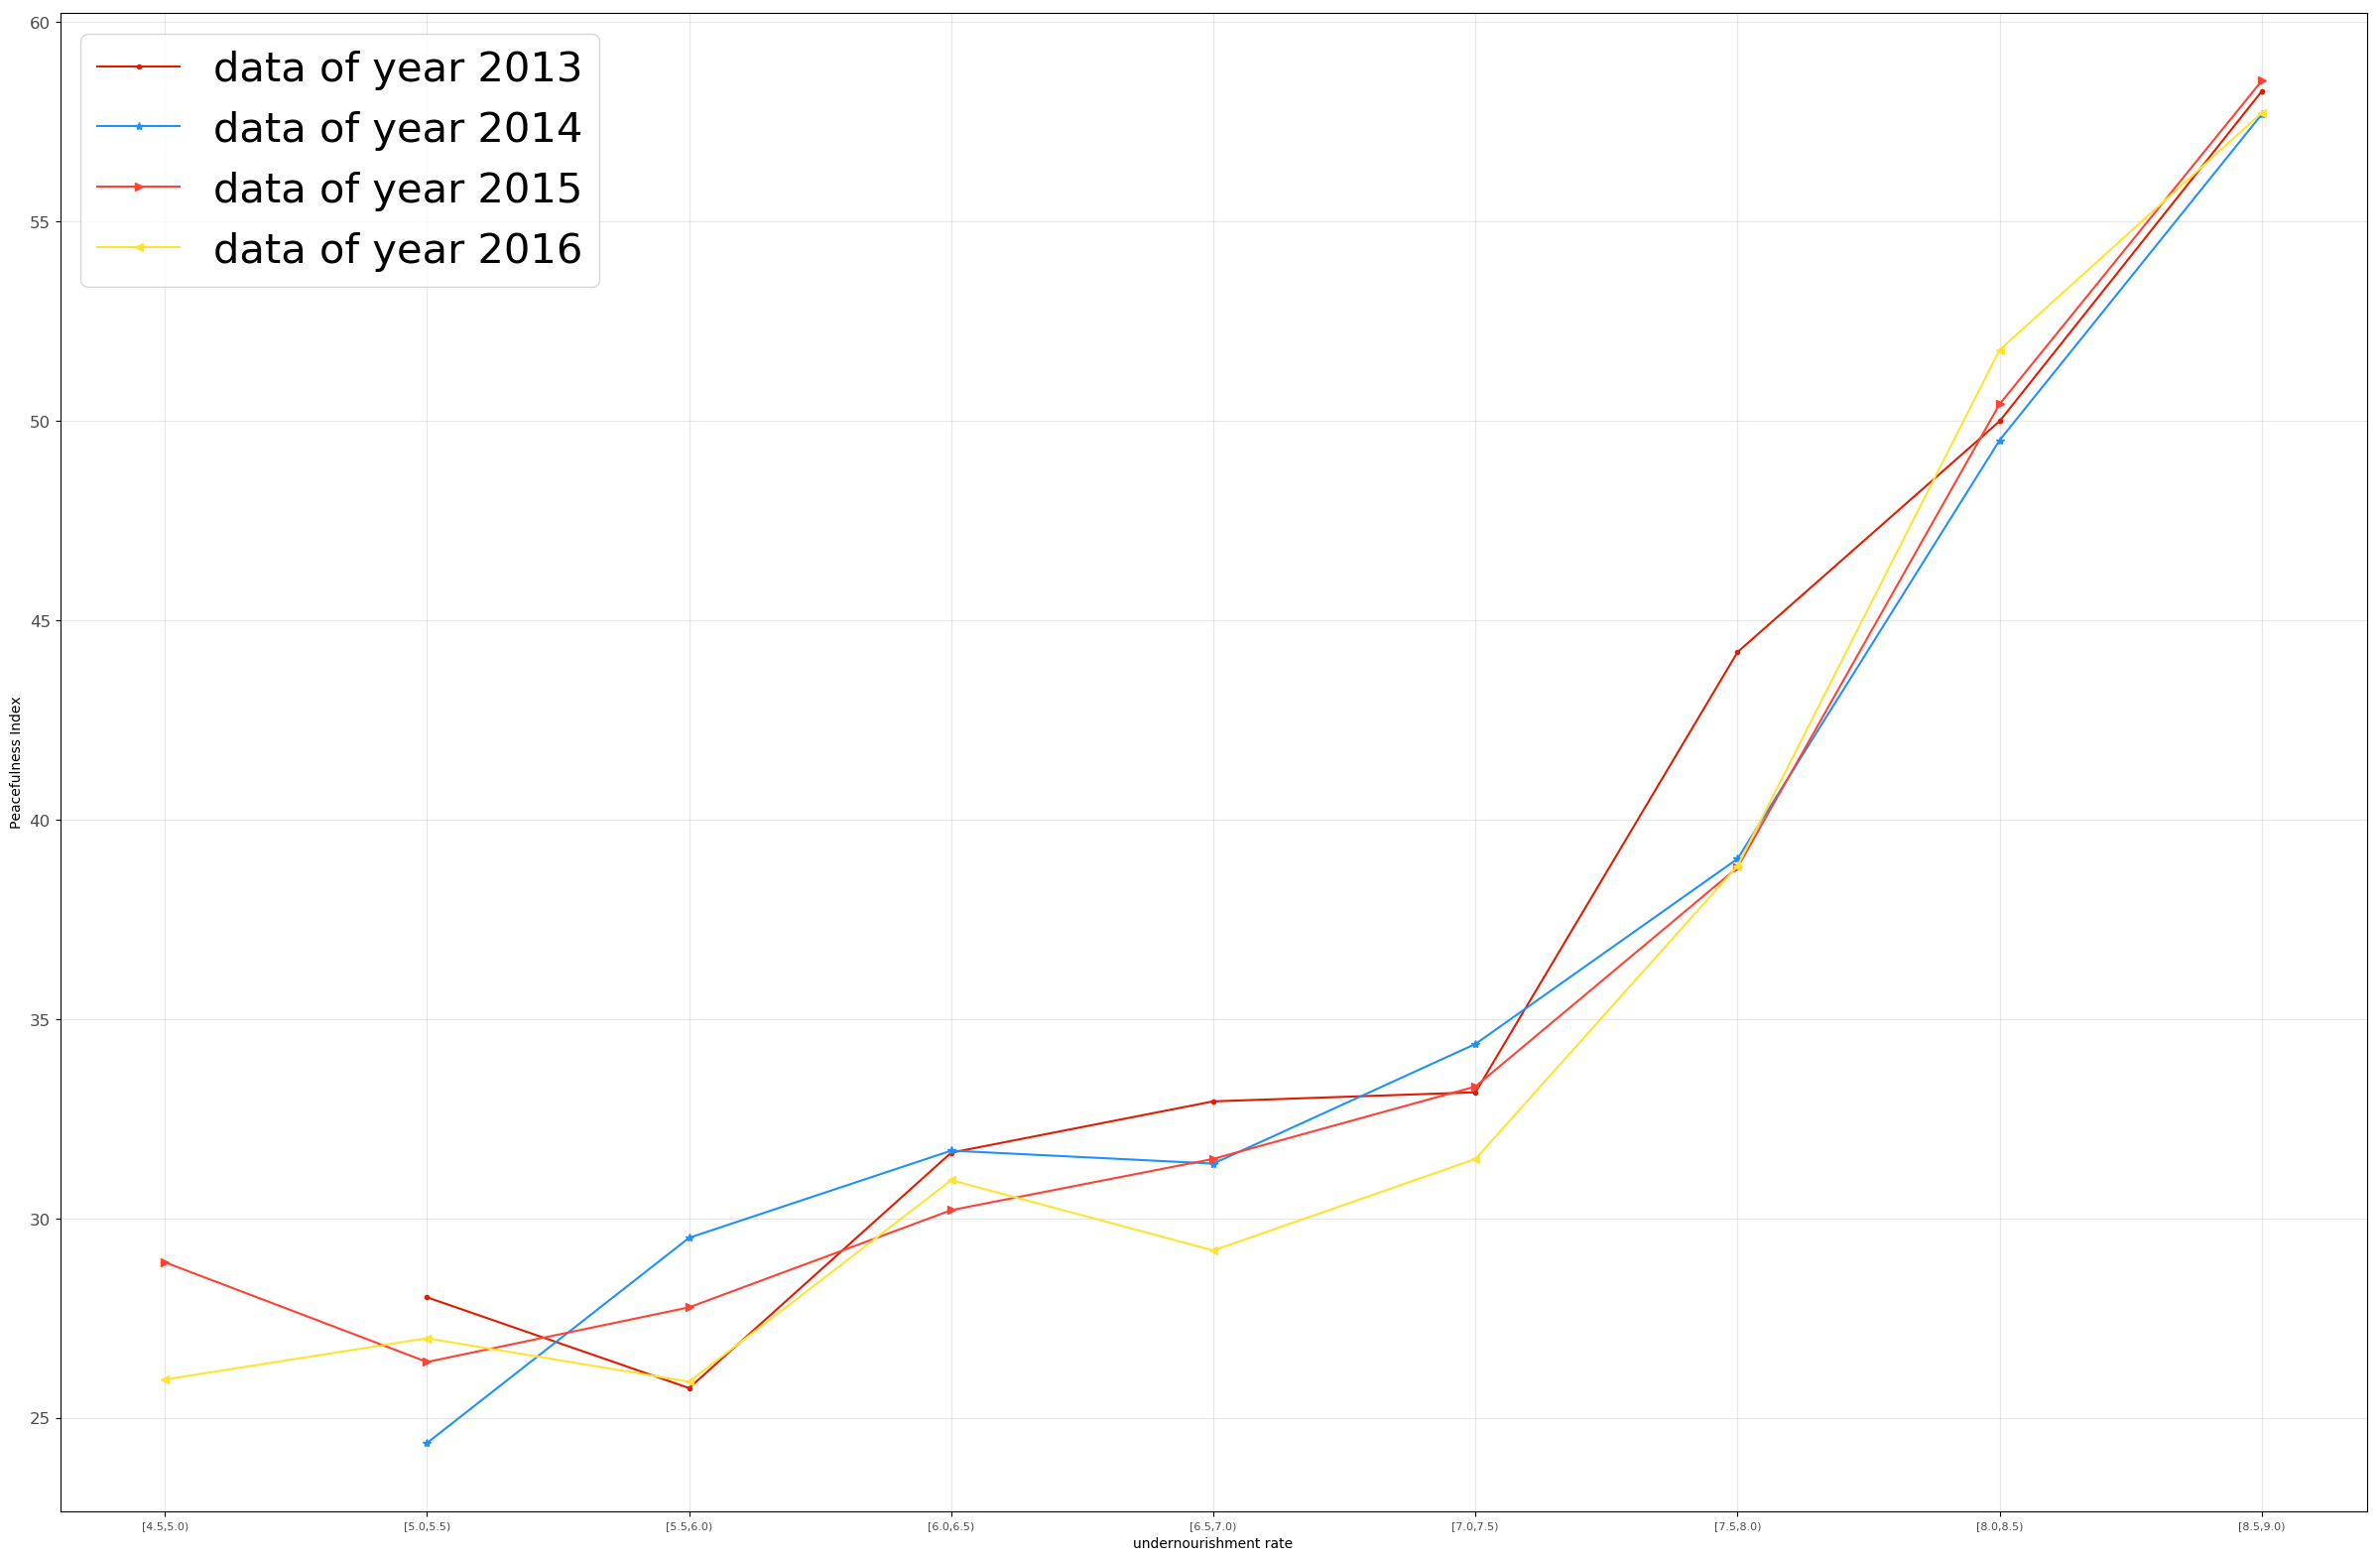

In [425]:
plot24_cat(x_list, y_list)